In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import random 
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import time
import sys
import pygame
import threading
import io

pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
df = pd.read_csv('pokemon.csv')

# Display the first few rows of the DataFrame
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
# Display the shape of the DataFrame
df.shape

(801, 41)

In [4]:
# Get the list of all column names
columns = df.columns.tolist()

# Print the list of columns
print(columns)

['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']


In [5]:
# Specify the columns you want to drop (Columns that are not required in pokemon fights)
columns_to_drop = ['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'experience_growth', 'height_m', 'percentage_male', 'weight_kg']

# Drop the specified columns
df1 = df.drop(columns=columns_to_drop)
df1.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigidaneフシギダネ,Bulbasaur,1,65,65,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigisouフシギソウ,Ivysaur,2,80,80,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigibanaフシギバナ,Venusaur,3,122,120,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Hitokageヒトカゲ,Charmander,4,60,50,65,fire,NaN,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Lizardoリザード,Charmeleon,5,80,65,80,fire,NaN,1,0


In [6]:
#Checking for the null values in my df1
df1.isna().sum()

abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
classfication         0
defense               0
hp                    0
japanese_name         0
name                  0
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2               384
generation            0
is_legendary          0
dtype: int64

In [7]:
# Replace NaN values with the text 'None' to compensate the fact that some of the pokemon only have 1 type.
df1 = df1.fillna('none')
df1.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigidaneフシギダネ,Bulbasaur,1,65,65,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigisouフシギソウ,Ivysaur,2,80,80,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigibanaフシギバナ,Venusaur,3,122,120,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Hitokageヒトカゲ,Charmander,4,60,50,65,fire,none,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Lizardoリザード,Charmeleon,5,80,65,80,fire,none,1,0


In [8]:
#Check the different types existing in our df1
df1['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [9]:
#Check for duplicates in our df1
df1.duplicated().sum()

0

In [10]:
df1

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigidaneフシギダネ,Bulbasaur,1,65,65,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigisouフシギソウ,Ivysaur,2,80,80,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigibanaフシギバナ,Venusaur,3,122,120,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Hitokageヒトカゲ,Charmander,4,60,50,65,fire,none,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Lizardoリザード,Charmeleon,5,80,65,80,fire,none,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Tekkaguyaテッカグヤ,Celesteela,797,107,101,61,steel,flying,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kamiturugiカミツルギ,Kartana,798,59,31,109,grass,steel,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Akuzikingアクジキング,Guzzlord,799,97,53,43,dark,dragon,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozmaネクロズマ,Necrozma,800,127,89,79,psychic,none,7,1


In [11]:
types = ["bug", "dark", "dragon", "electric", "fairy", "fight", "fire", 
         "flying", "ghost", "grass", "ground", "ice", "normal", "poison", 
         "psychic", "rock", "steel", "water"]

# Define columns: type1 and one column for each type effectiveness
columns = ["type1"] + [f"against_{t}" for t in types]

In [12]:
# Assuming df1 has a column 'type1' and effectiveness columns like 'against_bug', 'against_dark', etc.
# Get the unique 'type1' values
unique_types = df1['type1'].unique()

# Prepare a list of columns starting with 'against'
effectiveness_columns = [col for col in df1.columns if col.startswith("against_")]

# Create a new DataFrame with 'type1' and the effectiveness columns
type_effectiveness_table = df1[["type1"] + effectiveness_columns]

# Drop duplicates to get unique types without averaging
type_effectiveness_table = type_effectiveness_table.drop_duplicates(subset=["type1"])

# Set the index to range from 1 to the number of unique types (18)
type_effectiveness_table.index = range(1, len(type_effectiveness_table) + 1)

# Display the resulting table
print(type_effectiveness_table)

       type1  against_bug  against_dark  against_dragon  against_electric  \
1      grass         1.00           1.0             1.0               0.5   
2       fire         0.50           1.0             1.0               1.0   
3      water         1.00           1.0             1.0               2.0   
4        bug         1.00           1.0             1.0               1.0   
5     normal         0.50           1.0             1.0               2.0   
6     poison         0.50           1.0             1.0               1.0   
7   electric         1.00           1.0             1.0               0.5   
8     ground         1.00           1.0             1.0               0.0   
9      fairy         0.50           0.5             0.0               1.0   
10  fighting         0.50           0.5             1.0               1.0   
11   psychic         2.00           2.0             1.0               1.0   
12      rock         1.00           1.0             1.0               0.0   

In [13]:
# Mapping of generation to versions
generation_versions = {
    1: 'Blue, Red and Yellow',
    2: 'Gold, Silver and Crystal',
    3: 'Sapphire, Ruby and Emerald',
    4: 'Diamond, Pearl and Platinum',
    5: 'Black and White',
    6: 'X and Y',
    7: 'Moon and Sun'
}

# Adding the 'version' column based on the 'generation' column
df1['version'] = df1['generation'].map(generation_versions)

In [14]:
#Replacing the ": " by "-" of the pokemon Type: Null to handle further problem with the name of the pictures 
df1['name'] = df1['name'].replace("Type: Null", "Type-Null")

In [15]:
df1.to_csv('Pokemon_version.csv', index=False)

In [16]:
df1.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary,version
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,1,65,65,45,grass,poison,1,0,"Blue, Red and Yellow"
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,2,80,80,60,grass,poison,1,0,"Blue, Red and Yellow"
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,3,122,120,80,grass,poison,1,0,"Blue, Red and Yellow"
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,4,60,50,65,fire,none,1,0,"Blue, Red and Yellow"
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,5,80,65,80,fire,none,1,0,"Blue, Red and Yellow"


In [17]:
pokemon_names = df1['name'].tolist()

In [18]:
len(pokemon_names)

801

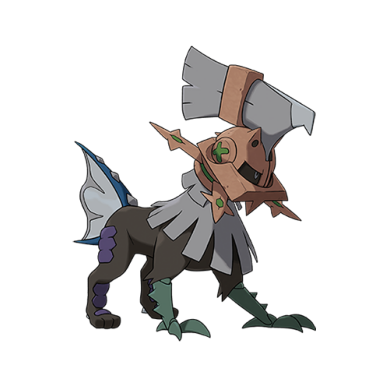

In [19]:
# Define the path to the Images folder
def display_pokemon_image(pokemon_names):
    images_folder = "Images"

    # Map Pokémon names to their image file paths
    images = {
        "abomasnow": os.path.join(images_folder, "abomasnow.png"),
        "abra": os.path.join(images_folder, "abra.png"),
        "absol": os.path.join(images_folder, "absol.png"),
        "accelgor": os.path.join(images_folder, "accelgor.png"),
        "aegislash": os.path.join(images_folder, "aegislash.png"),
        "aerodactyl": os.path.join(images_folder, "aerodactyl.png"),
        "aggron": os.path.join(images_folder, "aggron.png"),
        "aipom": os.path.join(images_folder, "aipom.png"),
        "alakazam": os.path.join(images_folder, "alakazam.png"),
        "alcremie": os.path.join(images_folder, "alcremie.png"),
        "alomomola": os.path.join(images_folder, "alomomola.png"),
        "altaria": os.path.join(images_folder, "altaria.png"),
        "amaura": os.path.join(images_folder, "amaura.png"),
        "ambipom": os.path.join(images_folder, "ambipom.png"),
        "amoonguss": os.path.join(images_folder, "amoonguss.png"),
        "ampharos": os.path.join(images_folder, "ampharos.png"),
        "annihilape": os.path.join(images_folder, "annihilape.png"),
        "anorith": os.path.join(images_folder, "anorith.png"),
        "appletun": os.path.join(images_folder, "appletun.png"),
        "applin": os.path.join(images_folder, "applin.png"),
        "araquanid": os.path.join(images_folder, "araquanid.png"),
        "arbok": os.path.join(images_folder, "arbok.png"),
        "arboliva": os.path.join(images_folder, "arboliva.png"),
        "arcanine": os.path.join(images_folder, "arcanine.png"),
        "arceus": os.path.join(images_folder, "arceus.png"),
        "archaludon": os.path.join(images_folder, "archaludon.png"),
        "archen": os.path.join(images_folder, "archen.png"),
        "archeops": os.path.join(images_folder, "archeops.png"),
        "arctibax": os.path.join(images_folder, "arctibax.png"),
        "arctovish": os.path.join(images_folder, "arctovish.png"),
        "arctozolt": os.path.join(images_folder, "arctozolt.png"),
        "ariados": os.path.join(images_folder, "ariados.png"),
        "armaldo": os.path.join(images_folder, "armaldo.png"),
        "armarouge": os.path.join(images_folder, "armarouge.png"),
        "aromatisse": os.path.join(images_folder, "aromatisse.png"),
        "aron": os.path.join(images_folder, "aron.png"),
        "arrokuda": os.path.join(images_folder, "arrokuda.png"),
        "articuno": os.path.join(images_folder, "articuno.png"),
        "audino": os.path.join(images_folder, "audino.png"),
        "aurorus": os.path.join(images_folder, "aurorus.png"),
        "avalugg": os.path.join(images_folder, "avalugg.png"),
        "axew": os.path.join(images_folder, "axew.png"),
        "azelf": os.path.join(images_folder, "azelf.png"),
        "azumarill": os.path.join(images_folder, "azumarill.png"),
        "azurill": os.path.join(images_folder, "azurill.png"),
        "bagon": os.path.join(images_folder, "bagon.png"),
        "baltoy": os.path.join(images_folder, "baltoy.png"),
        "banette": os.path.join(images_folder, "banette.png"),
        "barbaracle": os.path.join(images_folder, "barbaracle.png"),
        "barboach": os.path.join(images_folder, "barboach.png"),
        "barraskewda": os.path.join(images_folder, "barraskewda.png"),
        "basculegion": os.path.join(images_folder, "basculegion.png"),
        "basculin": os.path.join(images_folder, "basculin.png"),
        "bastiodon": os.path.join(images_folder, "bastiodon.png"),
        "baxcalibur": os.path.join(images_folder, "baxcalibur.png"),
        "bayleef": os.path.join(images_folder, "bayleef.png"),
        "beartic": os.path.join(images_folder, "beartic.png"),
        "beautifly": os.path.join(images_folder, "beautifly.png"),
        "beedrill": os.path.join(images_folder, "beedrill.png"),
        "beheeyem": os.path.join(images_folder, "beheeyem.png"),
        "beldum": os.path.join(images_folder, "beldum.png"),
        "bellibolt": os.path.join(images_folder, "bellibolt.png"),
        "bellossom": os.path.join(images_folder, "bellossom.png"),
        "bellsprout": os.path.join(images_folder, "bellsprout.png"),
        "bergmite": os.path.join(images_folder, "bergmite.png"),
        "bewear": os.path.join(images_folder, "bewear.png"),
        "bibarel": os.path.join(images_folder, "bibarel.png"),
        "bidoof": os.path.join(images_folder, "bidoof.png"),
        "binacle": os.path.join(images_folder, "binacle.png"),
        "bisharp": os.path.join(images_folder, "bisharp.png"),
        "blacephalon": os.path.join(images_folder, "blacephalon.png"),
        "blastoise": os.path.join(images_folder, "blastoise.png"),
        "blaziken": os.path.join(images_folder, "blaziken.png"),
        "blipbug": os.path.join(images_folder, "blipbug.png"),
        "blissey": os.path.join(images_folder, "blissey.png"),
        "blitzle": os.path.join(images_folder, "blitzle.png"),
        "boldore": os.path.join(images_folder, "boldore.png"),
        "boltund": os.path.join(images_folder, "boltund.png"),
        "bombirdier": os.path.join(images_folder, "bombirdier.png"),
        "bonsly": os.path.join(images_folder, "bonsly.png"),
        "bouffalant": os.path.join(images_folder, "bouffalant.png"),
        "bounsweet": os.path.join(images_folder, "bounsweet.png"),
        "braixen": os.path.join(images_folder, "braixen.png"),
        "brambleghast": os.path.join(images_folder, "brambleghast.png"),
        "bramblin": os.path.join(images_folder, "bramblin.png"),
        "braviary": os.path.join(images_folder, "braviary.png"),
        "breloom": os.path.join(images_folder, "breloom.png"),
        "brionne": os.path.join(images_folder, "brionne.png"),
        "bronzong": os.path.join(images_folder, "bronzong.png"),
        "bronzor": os.path.join(images_folder, "bronzor.png"),
        "brute_bonnet": os.path.join(images_folder, "brute_bonnet.png"),
        "bruxish": os.path.join(images_folder, "bruxish.png"),
        "budew": os.path.join(images_folder, "budew.png"),
        "buizel": os.path.join(images_folder, "buizel.png"),
        "bulbasaur": os.path.join(images_folder, "bulbasaur.png"),
        "buneary": os.path.join(images_folder, "buneary.png"),
        "bunnelby": os.path.join(images_folder, "bunnelby.png"),
        "burmy": os.path.join(images_folder, "burmy.png"),
        "butterfree": os.path.join(images_folder, "butterfree.png"),
        "buzzwole": os.path.join(images_folder, "buzzwole.png"),
        "cacnea": os.path.join(images_folder, "cacnea.png"),
        "cacturne": os.path.join(images_folder, "cacturne.png"),
        "calyrex": os.path.join(images_folder, "calyrex.png"),
        "camerupt": os.path.join(images_folder, "camerupt.png"),
        "capsakid": os.path.join(images_folder, "capsakid.png"),
        "carbink": os.path.join(images_folder, "carbink.png"),
        "carkol": os.path.join(images_folder, "carkol.png"),
        "carnivine": os.path.join(images_folder, "carnivine.png"),
        "carracosta": os.path.join(images_folder, "carracosta.png"),
        "carvanha": os.path.join(images_folder, "carvanha.png"),
        "cascoon": os.path.join(images_folder, "cascoon.png"),
        "castform": os.path.join(images_folder, "castform.png"),
        "caterpie": os.path.join(images_folder, "caterpie.png"),
        "celebi": os.path.join(images_folder, "celebi.png"),
        "celesteela": os.path.join(images_folder, "celesteela.png"),
        "centiskorch": os.path.join(images_folder, "centiskorch.png"),
        "ceruledge": os.path.join(images_folder, "ceruledge.png"),
        "cetitan": os.path.join(images_folder, "cetitan.png"),
        "cetoddle": os.path.join(images_folder, "cetoddle.png"),
        "chandelure": os.path.join(images_folder, "chandelure.png"),
        "chansey": os.path.join(images_folder, "chansey.png"),
        "charcadet": os.path.join(images_folder, "charcadet.png"),
        "charizard": os.path.join(images_folder, "charizard.png"),
        "charjabug": os.path.join(images_folder, "charjabug.png"),
        "charmander": os.path.join(images_folder, "charmander.png"),
        "charmeleon": os.path.join(images_folder, "charmeleon.png"),
        "chatot": os.path.join(images_folder, "chatot.png"),
        "cherrim": os.path.join(images_folder, "cherrim.png"),
        "cherubi": os.path.join(images_folder, "cherubi.png"),
        "chesnaught": os.path.join(images_folder, "chesnaught.png"),
        "chespin": os.path.join(images_folder, "chespin.png"),
        "chewtle": os.path.join(images_folder, "chewtle.png"),
        "chi_yu": os.path.join(images_folder, "chi_yu.png"),
        "chien_pao": os.path.join(images_folder, "chien_pao.png"),
        "chikorita": os.path.join(images_folder, "chikorita.png"),
        "chimchar": os.path.join(images_folder, "chimchar.png"),
        "chimecho": os.path.join(images_folder, "chimecho.png"),
        "chinchou": os.path.join(images_folder, "chinchou.png"),
        "chingling": os.path.join(images_folder, "chingling.png"),
        "cinccino": os.path.join(images_folder, "cinccino.png"),
        "cinderace": os.path.join(images_folder, "cinderace.png"),
        "clamperl": os.path.join(images_folder, "clamperl.png"),
        "clauncher": os.path.join(images_folder, "clauncher.png"),
        "clawitzer": os.path.join(images_folder, "clawitzer.png"),
        "claydol": os.path.join(images_folder, "claydol.png"),
        "clefable": os.path.join(images_folder, "clefable.png"),
        "clefairy": os.path.join(images_folder, "clefairy.png"),
        "cleffa": os.path.join(images_folder, "cleffa.png"),
        "clobbopus": os.path.join(images_folder, "clobbopus.png"),
        "clodsire": os.path.join(images_folder, "clodsire.png"),
        "cloyster": os.path.join(images_folder, "cloyster.png"),
        "coalossal": os.path.join(images_folder, "coalossal.png"),
        "cobalion": os.path.join(images_folder, "cobalion.png"),
        "cofagrigus": os.path.join(images_folder, "cofagrigus.png"),
        "combee": os.path.join(images_folder, "combee.png"),
        "combusken": os.path.join(images_folder, "combusken.png"),
        "comfey": os.path.join(images_folder, "comfey.png"),
        "conkeldurr": os.path.join(images_folder, "conkeldurr.png"),
        "copperajah": os.path.join(images_folder, "copperajah.png"),
        "corphish": os.path.join(images_folder, "corphish.png"),
        "corsola": os.path.join(images_folder, "corsola.png"),
        "corviknight": os.path.join(images_folder, "corviknight.png"),
        "corvisquire": os.path.join(images_folder, "corvisquire.png"),
        "cosmoem": os.path.join(images_folder, "cosmoem.png"),
        "cosmog": os.path.join(images_folder, "cosmog.png"),
        "cottonee": os.path.join(images_folder, "cottonee.png"),
        "crabominable": os.path.join(images_folder, "crabominable.png"),
        "crabrawler": os.path.join(images_folder, "crabrawler.png"),
        "cradily": os.path.join(images_folder, "cradily.png"),
        "cramorant": os.path.join(images_folder, "cramorant.png"),
        "cranidos": os.path.join(images_folder, "cranidos.png"),
        "crawdaunt": os.path.join(images_folder, "crawdaunt.png"),
        "cresselia": os.path.join(images_folder, "cresselia.png"),
        "croagunk": os.path.join(images_folder, "croagunk.png"),
        "crobat": os.path.join(images_folder, "crobat.png"),
        "crocalor": os.path.join(images_folder, "crocalor.png"),
        "croconaw": os.path.join(images_folder, "croconaw.png"),
        "crustle": os.path.join(images_folder, "crustle.png"),
        "cryogonal": os.path.join(images_folder, "cryogonal.png"),
        "cubchoo": os.path.join(images_folder, "cubchoo.png"),
        "cubone": os.path.join(images_folder, "cubone.png"),
        "cufant": os.path.join(images_folder, "cufant.png"),
        "cursola": os.path.join(images_folder, "cursola.png"),
        "cutiefly": os.path.join(images_folder, "cutiefly.png"),
        "cyclizar": os.path.join(images_folder, "cyclizar.png"),
        "cyndaquil": os.path.join(images_folder, "cyndaquil.png"),
        "dachsbun": os.path.join(images_folder, "dachsbun.png"),
        "darkrai": os.path.join(images_folder, "darkrai.png"),
        "darmanitan": os.path.join(images_folder, "darmanitan.png"),
        "dartrix": os.path.join(images_folder, "dartrix.png"),
        "darumaka": os.path.join(images_folder, "darumaka.png"),
        "decidueye": os.path.join(images_folder, "decidueye.png"),
        "dedenne": os.path.join(images_folder, "dedenne.png"),
        "deerling": os.path.join(images_folder, "deerling.png"),
        "deino": os.path.join(images_folder, "deino.png"),
        "delcatty": os.path.join(images_folder, "delcatty.png"),
        "delibird": os.path.join(images_folder, "delibird.png"),
        "delphox": os.path.join(images_folder, "delphox.png"),
        "deoxys": os.path.join(images_folder, "deoxys.png"),
        "dewgong": os.path.join(images_folder, "dewgong.png"),
        "dewott": os.path.join(images_folder, "dewott.png"),
        "dewpider": os.path.join(images_folder, "dewpider.png"),
        "dhelmise": os.path.join(images_folder, "dhelmise.png"),
        "dialga": os.path.join(images_folder, "dialga.png"),
        "diancie": os.path.join(images_folder, "diancie.png"),
        "diggersby": os.path.join(images_folder, "diggersby.png"),
        "diglett": os.path.join(images_folder, "diglett.png"),
        "dipplin": os.path.join(images_folder, "dipplin.png"),
        "ditto": os.path.join(images_folder, "ditto.png"),
        "dodrio": os.path.join(images_folder, "dodrio.png"),
        "doduo": os.path.join(images_folder, "doduo.png"),
        "dolliv": os.path.join(images_folder, "dolliv.png"),
        "dondozo": os.path.join(images_folder, "dondozo.png"),
        "donphan": os.path.join(images_folder, "donphan.png"),
        "dottler": os.path.join(images_folder, "dottler.png"),
        "doublade": os.path.join(images_folder, "doublade.png"),
        "dracovish": os.path.join(images_folder, "dracovish.png"),
        "dracozolt": os.path.join(images_folder, "dracozolt.png"),
        "dragalge": os.path.join(images_folder, "dragalge.png"),
        "dragapult": os.path.join(images_folder, "dragapult.png"),
        "dragonair": os.path.join(images_folder, "dragonair.png"),
        "dragonite": os.path.join(images_folder, "dragonite.png"),
        "drakloak": os.path.join(images_folder, "drakloak.png"),
        "drampa": os.path.join(images_folder, "drampa.png"),
        "drapion": os.path.join(images_folder, "drapion.png"),
        "dratini": os.path.join(images_folder, "dratini.png"),
        "drednaw": os.path.join(images_folder, "drednaw.png"),
        "dreepy": os.path.join(images_folder, "dreepy.png"),
        "drifblim": os.path.join(images_folder, "drifblim.png"),
        "drifloon": os.path.join(images_folder, "drifloon.png"),
        "drilbur": os.path.join(images_folder, "drilbur.png"),
        "drizzile": os.path.join(images_folder, "drizzile.png"),
        "drowzee": os.path.join(images_folder, "drowzee.png"),
        "druddigon": os.path.join(images_folder, "druddigon.png"),
        "dubwool": os.path.join(images_folder, "dubwool.png"),
        "ducklett": os.path.join(images_folder, "ducklett.png"),
        "dudunsparce": os.path.join(images_folder, "dudunsparce.png"),
        "dugtrio": os.path.join(images_folder, "dugtrio.png"),
        "dunsparce": os.path.join(images_folder, "dunsparce.png"),
        "duosion": os.path.join(images_folder, "duosion.png"),
        "duraludon": os.path.join(images_folder, "duraludon.png"),
        "durant": os.path.join(images_folder, "durant.png"),
        "dusclops": os.path.join(images_folder, "dusclops.png"),
        "dusknoir": os.path.join(images_folder, "dusknoir.png"),
        "duskull": os.path.join(images_folder, "duskull.png"),
        "dustox": os.path.join(images_folder, "dustox.png"),
        "dwebble": os.path.join(images_folder, "dwebble.png"),
        "eelektrik": os.path.join(images_folder, "eelektrik.png"),
        "eelektross": os.path.join(images_folder, "eelektross.png"),
        "eevee": os.path.join(images_folder, "eevee.png"),
        "eiscue": os.path.join(images_folder, "eiscue.png"),
        "ekans": os.path.join(images_folder, "ekans.png"),
        "eldegoss": os.path.join(images_folder, "eldegoss.png"),
        "electabuzz": os.path.join(images_folder, "electabuzz.png"),
        "electivire": os.path.join(images_folder, "electivire.png"),
        "electrike": os.path.join(images_folder, "electrike.png"),
        "electrode": os.path.join(images_folder, "electrode.png"),
        "elekid": os.path.join(images_folder, "elekid.png"),
        "elgyem": os.path.join(images_folder, "elgyem.png"),
        "emboar": os.path.join(images_folder, "emboar.png"),
        "emolga": os.path.join(images_folder, "emolga.png"),
        "empoleon": os.path.join(images_folder, "empoleon.png"),
        "enamorus": os.path.join(images_folder, "enamorus.png"),
        "entei": os.path.join(images_folder, "entei.png"),
        "escavalier": os.path.join(images_folder, "escavalier.png"),
        "espathra": os.path.join(images_folder, "espathra.png"),
        "espeon": os.path.join(images_folder, "espeon.png"),
        "espurr": os.path.join(images_folder, "espurr.png"),
        "eternatus": os.path.join(images_folder, "eternatus.png"),
        "excadrill": os.path.join(images_folder, "excadrill.png"),
        "exeggcute": os.path.join(images_folder, "exeggcute.png"),
        "exeggutor": os.path.join(images_folder, "exeggutor.png"),
        "exploud": os.path.join(images_folder, "exploud.png"),
        "falinks": os.path.join(images_folder, "falinks.png"),
        "farfetch'd": os.path.join(images_folder, "farfetch'd.png"),
        "farigiraf": os.path.join(images_folder, "farigiraf.png"),
        "fearow": os.path.join(images_folder, "fearow.png"),
        "feebas": os.path.join(images_folder, "feebas.png"),
        "fennekin": os.path.join(images_folder, "fennekin.png"),
        "feraligatr": os.path.join(images_folder, "feraligatr.png"),
        "ferroseed": os.path.join(images_folder, "ferroseed.png"),
        "ferrothorn": os.path.join(images_folder, "ferrothorn.png"),
        "fezandipiti": os.path.join(images_folder, "fezandipiti.png"),
        "fidough": os.path.join(images_folder, "fidough.png"),
        "finizen": os.path.join(images_folder, "finizen.png"),
        "finneon": os.path.join(images_folder, "finneon.png"),
        "flaaffy": os.path.join(images_folder, "flaaffy.png"),
        "flabébé": os.path.join(images_folder, "flabébé.png"),
        "flamigo": os.path.join(images_folder, "flamigo.png"),
        "flapple": os.path.join(images_folder, "flapple.png"),
        "flareon": os.path.join(images_folder, "flareon.png"),
        "fletchinder": os.path.join(images_folder, "fletchinder.png"),
        "fletchling": os.path.join(images_folder, "fletchling.png"),
        "flittle": os.path.join(images_folder, "flittle.png"),
        "floatzel": os.path.join(images_folder, "floatzel.png"),
        "floette": os.path.join(images_folder, "floette.png"),
        "floragato": os.path.join(images_folder, "floragato.png"),
        "florges": os.path.join(images_folder, "florges.png"),
        "flutter mane": os.path.join(images_folder, "flutter mane.png"),
        "flygon": os.path.join(images_folder, "flygon.png"),
        "fomantis": os.path.join(images_folder, "fomantis.png"),
        "foongus": os.path.join(images_folder, "foongus.png"),
        "forretress": os.path.join(images_folder, "forretress.png"),
        "fraxure": os.path.join(images_folder, "fraxure.png"),
        "frigibax": os.path.join(images_folder, "frigibax.png"),
        "frillish": os.path.join(images_folder, "frillish.png"),
        "froakie": os.path.join(images_folder, "froakie.png"),
        "frogadier": os.path.join(images_folder, "frogadier.png"),
        "froslass": os.path.join(images_folder, "froslass.png"),
        "frosmoth": os.path.join(images_folder, "frosmoth.png"),
        "fuecoco": os.path.join(images_folder, "fuecoco.png"),
        "furfrou": os.path.join(images_folder, "furfrou.png"),
        "furret": os.path.join(images_folder, "furret.png"),
        "gabite": os.path.join(images_folder, "gabite.png"),
        "gallade": os.path.join(images_folder, "gallade.png"),
        "galvantula": os.path.join(images_folder, "galvantula.png"),
        "garbodor": os.path.join(images_folder, "garbodor.png"),
        "garchomp": os.path.join(images_folder, "garchomp.png"),
        "gardevoir": os.path.join(images_folder, "gardevoir.png"),
        "garganacl": os.path.join(images_folder, "garganacl.png"),
        "gastly": os.path.join(images_folder, "gastly.png"),
        "gastrodon": os.path.join(images_folder, "gastrodon.png"),
        "genesect": os.path.join(images_folder, "genesect.png"),
        "gengar": os.path.join(images_folder, "gengar.png"),
        "geodude": os.path.join(images_folder, "geodude.png"),
        "gholdengo": os.path.join(images_folder, "gholdengo.png"),
        "gible": os.path.join(images_folder, "gible.png"),
        "gigalith": os.path.join(images_folder, "gigalith.png"),
        "gimmighoul": os.path.join(images_folder, "gimmighoul.png"),
        "girafarig": os.path.join(images_folder, "girafarig.png"),
        "giratina": os.path.join(images_folder, "giratina.png"),
        "glaceon": os.path.join(images_folder, "glaceon.png"),
        "glalie": os.path.join(images_folder, "glalie.png"),
        "glameow": os.path.join(images_folder, "glameow.png"),
        "glastrier": os.path.join(images_folder, "glastrier.png"),
        "gligar": os.path.join(images_folder, "gligar.png"),
        "glimmet": os.path.join(images_folder, "glimmet.png"),
        "glimmora": os.path.join(images_folder, "glimmora.png"),
        "gliscor": os.path.join(images_folder, "gliscor.png"),
        "gloom": os.path.join(images_folder, "gloom.png"),
        "gogoat": os.path.join(images_folder, "gogoat.png"),
        "golbat": os.path.join(images_folder, "golbat.png"),
        "goldeen": os.path.join(images_folder, "goldeen.png"),
        "golduck": os.path.join(images_folder, "golduck.png"),
        "golem": os.path.join(images_folder, "golem.png"),
        "golett": os.path.join(images_folder, "golett.png"),
        "golisopod": os.path.join(images_folder, "golisopod.png"),
        "golurk": os.path.join(images_folder, "golurk.png"),
        "goodra": os.path.join(images_folder, "goodra.png"),
        "goomy": os.path.join(images_folder, "goomy.png"),
        "gorebyss": os.path.join(images_folder, "gorebyss.png"),
        "gossifleur": os.path.join(images_folder, "gossifleur.png"),
        "gothita": os.path.join(images_folder, "gothita.png"),
        "gothitelle": os.path.join(images_folder, "gothitelle.png"),
        "gothorita": os.path.join(images_folder, "gothorita.png"),
        "gouging fire": os.path.join(images_folder, "gouging fire.png"),
        "gourgeist": os.path.join(images_folder, "gourgeist.png"),
        "grafaiai": os.path.join(images_folder, "grafaiai.png"),
        "granbull": os.path.join(images_folder, "granbull.png"),
        "grapploct": os.path.join(images_folder, "grapploct.png"),
        "graveler": os.path.join(images_folder, "graveler.png"),
        "great tusk": os.path.join(images_folder, "great tusk.png"),
        "greavard": os.path.join(images_folder, "greavard.png"),
        "greedent": os.path.join(images_folder, "greedent.png"),
        "greninja": os.path.join(images_folder, "greninja.png"),
        "grimer": os.path.join(images_folder, "grimer.png"),
        "grimmsnarl": os.path.join(images_folder, "grimmsnarl.png"),
        "grookey": os.path.join(images_folder, "grookey.png"),
        "grotle": os.path.join(images_folder, "grotle.png"),
        "groudon": os.path.join(images_folder, "groudon.png"),
        "grovyle": os.path.join(images_folder, "grovyle.png"),
        "growlithe": os.path.join(images_folder, "growlithe.png"),
        "grubbin": os.path.join(images_folder, "grubbin.png"),
        "grumpig": os.path.join(images_folder, "grumpig.png"),
        "gulpin": os.path.join(images_folder, "gulpin.png"),
        "gumshoos": os.path.join(images_folder, "gumshoos.png"),
        "gurdurr": os.path.join(images_folder, "gurdurr.png"),
        "guzzlord": os.path.join(images_folder, "guzzlord.png"),
        "gyarados": os.path.join(images_folder, "gyarados.png"),
        "hakamo-o": os.path.join(images_folder, "hakamo-o.png"),
        "happiny": os.path.join(images_folder, "happiny.png"),
        "hariyama": os.path.join(images_folder, "hariyama.png"),
        "hatenna": os.path.join(images_folder, "hatenna.png"),
        "hatterene": os.path.join(images_folder, "hatterene.png"),
        "hattrem": os.path.join(images_folder, "hattrem.png"),
        "haunter": os.path.join(images_folder, "haunter.png"),
        "hawlucha": os.path.join(images_folder, "hawlucha.png"),
        "haxorus": os.path.join(images_folder, "haxorus.png"),
        "heatmor": os.path.join(images_folder, "heatmor.png"),
        "heatran": os.path.join(images_folder, "heatran.png"),
        "heliolisk": os.path.join(images_folder, "heliolisk.png"),
        "helioptile": os.path.join(images_folder, "helioptile.png"),
        "heracross": os.path.join(images_folder, "heracross.png"),
        "herdier": os.path.join(images_folder, "herdier.png"),
        "hippopotas": os.path.join(images_folder, "hippopotas.png"),
        "hippowdon": os.path.join(images_folder, "hippowdon.png"),
        "hitmonchan": os.path.join(images_folder, "hitmonchan.png"),
        "hitmonlee": os.path.join(images_folder, "hitmonlee.png"),
        "hitmontop": os.path.join(images_folder, "hitmontop.png"),
        "ho-oh": os.path.join(images_folder, "ho-oh.png"),
        "honchkrow": os.path.join(images_folder, "honchkrow.png"),
        "honedge": os.path.join(images_folder, "honedge.png"),
        "hoopa": os.path.join(images_folder, "hoopa.png"),
        "hoothoot": os.path.join(images_folder, "hoothoot.png"),
        "hoppip": os.path.join(images_folder, "hoppip.png"),
        "horsea": os.path.join(images_folder, "horsea.png"),
        "houndoom": os.path.join(images_folder, "houndoom.png"),
        "houndour": os.path.join(images_folder, "houndour.png"),
        "houndstone": os.path.join(images_folder, "houndstone.png"),
        "huntail": os.path.join(images_folder, "huntail.png"),
        "hydrapple": os.path.join(images_folder, "hydrapple.png"),
        "hydreigon": os.path.join(images_folder, "hydreigon.png"),
        "hypno": os.path.join(images_folder, "hypno.png"),
        "igglybuff": os.path.join(images_folder, "igglybuff.png"),
        "illumise": os.path.join(images_folder, "illumise.png"),
        "impidimp": os.path.join(images_folder, "impidimp.png"),
        "incineroar": os.path.join(images_folder, "incineroar.png"),
        "indeedee": os.path.join(images_folder, "indeedee.png"),
        "infernape": os.path.join(images_folder, "infernape.png"),
        "inkay": os.path.join(images_folder, "inkay.png"),
        "inteleon": os.path.join(images_folder, "inteleon.png"),
        "iron boulder": os.path.join(images_folder, "iron_boulder.png"),
        "iron bundle": os.path.join(images_folder, "iron_bundle.png"),
        "iron crown": os.path.join(images_folder, "iron_crown.png"),
        "iron hands": os.path.join(images_folder, "iron_hands.png"),
        "iron jugulis": os.path.join(images_folder, "iron_jugulis.png"),
        "iron leaves": os.path.join(images_folder, "iron_leaves.png"),
        "iron moth": os.path.join(images_folder, "iron_moth.png"),
        "iron thorns": os.path.join(images_folder, "iron_thorns.png"),
        "iron treads": os.path.join(images_folder, "iron_treads.png"),
        "iron valiant": os.path.join(images_folder, "iron_valiant.png"),
        "ivysaur": os.path.join(images_folder, "ivysaur.png"),
        "jangmo-o": os.path.join(images_folder, "jangmo-o.png"),
        "jellicent": os.path.join(images_folder, "jellicent.png"),
        "jigglypuff": os.path.join(images_folder, "jigglypuff.png"),
        "jirachi": os.path.join(images_folder, "jirachi.png"),
        "jolteon": os.path.join(images_folder, "jolteon.png"),
        "joltik": os.path.join(images_folder, "joltik.png"),
        "jumpluff": os.path.join(images_folder, "jumpluff.png"),
        "jynx": os.path.join(images_folder, "jynx.png"),
        "kabuto": os.path.join(images_folder, "kabuto.png"),
        "kabutops": os.path.join(images_folder, "kabutops.png"),
        "kadabra": os.path.join(images_folder, "kadabra.png"),
        "kakuna": os.path.join(images_folder, "kakuna.png"),
        "kangaskhan": os.path.join(images_folder, "kangaskhan.png"),
        "karrablast": os.path.join(images_folder, "karrablast.png"),
        "kartana": os.path.join(images_folder, "kartana.png"),
        "kecleon": os.path.join(images_folder, "kecleon.png"),
        "keldeo": os.path.join(images_folder, "keldeo.png"),
        "kilowattrel": os.path.join(images_folder, "kilowattrel.png"),
        "kingambit": os.path.join(images_folder, "kingambit.png"),
        "kingdra": os.path.join(images_folder, "kingdra.png"),
        "kingler": os.path.join(images_folder, "kingler.png"),
        "kirlia": os.path.join(images_folder, "kirlia.png"),
        "klang": os.path.join(images_folder, "klang.png"),
        "klawf": os.path.join(images_folder, "klawf.png"),
        "kleavor": os.path.join(images_folder, "kleavor.png"),
        "klefki": os.path.join(images_folder, "klefki.png"),
        "klink": os.path.join(images_folder, "klink.png"),
        "klinklang": os.path.join(images_folder, "klinklang.png"),
        "koffing": os.path.join(images_folder, "koffing.png"),
        "komala": os.path.join(images_folder, "komala.png"),
        "kommo-o": os.path.join(images_folder, "kommo-o.png"),
        "koraidon": os.path.join(images_folder, "koraidon.png"),
        "krabby": os.path.join(images_folder, "krabby.png"),
        "kricketot": os.path.join(images_folder, "kricketot.png"),
        "kricketune": os.path.join(images_folder, "kricketune.png"),
        "krokorok": os.path.join(images_folder, "krokorok.png"),
        "krookodile": os.path.join(images_folder, "krookodile.png"),
        "kubfu": os.path.join(images_folder, "kubfu.png"),
        "kyogre": os.path.join(images_folder, "kyogre.png"),
        "kyurem": os.path.join(images_folder, "kyurem.png"),
        "lairon": os.path.join(images_folder, "lairon.png"),
        "lampent": os.path.join(images_folder, "lampent.png"),
        "landorus": os.path.join(images_folder, "landorus.png"),
        "lanturn": os.path.join(images_folder, "lanturn.png"),
        "lapras": os.path.join(images_folder, "lapras.png"),
        "larvesta": os.path.join(images_folder, "larvesta.png"),
        "larvitar": os.path.join(images_folder, "larvitar.png"),
        "latias": os.path.join(images_folder, "latias.png"),
        "latios": os.path.join(images_folder, "latios.png"),
        "leafeon": os.path.join(images_folder, "leafeon.png"),
        "leavanny": os.path.join(images_folder, "leavanny.png"),
        "lechonk": os.path.join(images_folder, "lechonk.png"),
        "ledian": os.path.join(images_folder, "ledian.png"),
        "ledyba": os.path.join(images_folder, "ledyba.png"),
        "lickilicky": os.path.join(images_folder, "lickilicky.png"),
        "lickitung": os.path.join(images_folder, "lickitung.png"),
        "liepard": os.path.join(images_folder, "liepard.png"),
        "lileep": os.path.join(images_folder, "lileep.png"),
        "lilligant": os.path.join(images_folder, "lilligant.png"),
        "lillipup": os.path.join(images_folder, "lillipup.png"),
        "linoone": os.path.join(images_folder, "linoone.png"),
        "litleo": os.path.join(images_folder, "litleo.png"),
        "litten": os.path.join(images_folder, "litten.png"),
        "litwick": os.path.join(images_folder, "litwick.png"),
        "lokix": os.path.join(images_folder, "lokix.png"),
        "lombre": os.path.join(images_folder, "lombre.png"),
        "lopunny": os.path.join(images_folder, "lopunny.png"),
        "lotad": os.path.join(images_folder, "lotad.png"),
        "loudred": os.path.join(images_folder, "loudred.png"),
        "lucario": os.path.join(images_folder, "lucario.png"),
        "ludicolo": os.path.join(images_folder, "ludicolo.png"),
        "lugia": os.path.join(images_folder, "lugia.png"),
        "lumineon": os.path.join(images_folder, "lumineon.png"),
        "lunala": os.path.join(images_folder, "lunala.png"),
        "lunatone": os.path.join(images_folder, "lunatone.png"),
        "lurantis": os.path.join(images_folder, "lurantis.png"),
        "luvdisc": os.path.join(images_folder, "luvdisc.png"),
        "luxio": os.path.join(images_folder, "luxio.png"),
        "luxray": os.path.join(images_folder, "luxray.png"),
        "lycanroc": os.path.join(images_folder, "lycanroc.png"),
        "mabosstiff": os.path.join(images_folder, "mabosstiff.png"),
        "machamp": os.path.join(images_folder, "machamp.png"),
        "machoke": os.path.join(images_folder, "machoke.png"),
        "machop": os.path.join(images_folder, "machop.png"),
        "magby": os.path.join(images_folder, "magby.png"),
        "magcargo": os.path.join(images_folder, "magcargo.png"),
        "magearna": os.path.join(images_folder, "magearna.png"),
        "magikarp": os.path.join(images_folder, "magikarp.png"),
        "magmar": os.path.join(images_folder, "magmar.png"),
        "magmortar": os.path.join(images_folder, "magmortar.png"),
        "magnemite": os.path.join(images_folder, "magnemite.png"),
        "magneton": os.path.join(images_folder, "magneton.png"),
        "magnezone": os.path.join(images_folder, "magnezone.png"),
        "makuhita": os.path.join(images_folder, "makuhita.png"),
        "malamar": os.path.join(images_folder, "malamar.png"),
        "mamoswine": os.path.join(images_folder, "mamoswine.png"),
        "manaphy": os.path.join(images_folder, "manaphy.png"),
        "mandibuzz": os.path.join(images_folder, "mandibuzz.png"),
        "manectric": os.path.join(images_folder, "manectric.png"),
        "mankey": os.path.join(images_folder, "mankey.png"),
        "mantine": os.path.join(images_folder, "mantine.png"),
        "mantyke": os.path.join(images_folder, "mantyke.png"),
        "maractus": os.path.join(images_folder, "maractus.png"),
        "mareanie": os.path.join(images_folder, "mareanie.png"),
        "mareep": os.path.join(images_folder, "mareep.png"),
        "marill": os.path.join(images_folder, "marill.png"),
        "marowak": os.path.join(images_folder, "marowak.png"),
        "marshadow": os.path.join(images_folder, "marshadow.png"),
        "marshtomp": os.path.join(images_folder, "marshtomp.png"),
        "maschiff": os.path.join(images_folder, "maschiff.png"),
        "masquerain": os.path.join(images_folder, "masquerain.png"),
        "maushold": os.path.join(images_folder, "maushold.png"),
        "mawile": os.path.join(images_folder, "mawile.png"),
        "medicham": os.path.join(images_folder, "medicham.png"),
        "meditite": os.path.join(images_folder, "meditite.png"),
        "meganium": os.path.join(images_folder, "meganium.png"),
        "melmetal": os.path.join(images_folder, "melmetal.png"),
        "meloetta": os.path.join(images_folder, "meloetta.png"),
        "meltan": os.path.join(images_folder, "meltan.png"),
        "meowscarada": os.path.join(images_folder, "meowscarada.png"),
        "meowstic": os.path.join(images_folder, "meowstic.png"),
        "meowth": os.path.join(images_folder, "meowth.png"),
        "mesprit": os.path.join(images_folder, "mesprit.png"),
        "metagross": os.path.join(images_folder, "metagross.png"),
        "metang": os.path.join(images_folder, "metang.png"),
        "metapod": os.path.join(images_folder, "metapod.png"),
        "mew": os.path.join(images_folder, "mew.png"),
        "mewtwo": os.path.join(images_folder, "mewtwo.png"),
        "mienfoo": os.path.join(images_folder, "mienfoo.png"),
        "mienshao": os.path.join(images_folder, "mienshao.png"),
        "mightyena": os.path.join(images_folder, "mightyena.png"),
        "milcery": os.path.join(images_folder, "milcery.png"),
        "milotic": os.path.join(images_folder, "milotic.png"),
        "miltank": os.path.join(images_folder, "miltank.png"),
        "mime_jr": os.path.join(images_folder, "mime_jr.png"),
        "mimikyu": os.path.join(images_folder, "mimikyu.png"),
        "minccino": os.path.join(images_folder, "minccino.png"),
        "minior": os.path.join(images_folder, "minior.png"),
        "minun": os.path.join(images_folder, "minun.png"),
        "miraidon": os.path.join(images_folder, "miraidon.png"),
        "misdreavus": os.path.join(images_folder, "misdreavus.png"),
        "mismagius": os.path.join(images_folder, "mismagius.png"),
        "moltres": os.path.join(images_folder, "moltres.png"),
        "monferno": os.path.join(images_folder, "monferno.png"),
        "morelull": os.path.join(images_folder, "morelull.png"),
        "morgrem": os.path.join(images_folder, "morgrem.png"),
        "morpeko": os.path.join(images_folder, "morpeko.png"),
        "mothim": os.path.join(images_folder, "mothim.png"),
        "mr_mime": os.path.join(images_folder, "mr_mime.png"),
        "mr_rime": os.path.join(images_folder, "mr_rime.png"),
        "mudbray": os.path.join(images_folder, "mudbray.png"),
        "mudkip": os.path.join(images_folder, "mudkip.png"),
        "mudsdale": os.path.join(images_folder, "mudsdale.png"),
        "muk": os.path.join(images_folder, "muk.png"),
        "munchlax": os.path.join(images_folder, "munchlax.png"),
        "munkidori": os.path.join(images_folder, "munkidori.png"),
        "munna": os.path.join(images_folder, "munna.png"),
        "murkrow": os.path.join(images_folder, "murkrow.png"),
        "musharna": os.path.join(images_folder, "musharna.png"),
        "nacli": os.path.join(images_folder, "nacli.png"),
        "naclstack": os.path.join(images_folder, "naclstack.png"),
        "naganadel": os.path.join(images_folder, "naganadel.png"),
        "natu": os.path.join(images_folder, "natu.png"),
        "necrozma": os.path.join(images_folder, "necrozma.png"),
        "nickit": os.path.join(images_folder, "nickit.png"),
        "nidoking": os.path.join(images_folder, "nidoking.png"),
        "nidoqueen": os.path.join(images_folder, "nidoqueen.png"),
        "nidoran♀": os.path.join(images_folder, "nidoran♀.png"),
        "nidoran♂": os.path.join(images_folder, "nidoran♂.png"),
        "nidorina": os.path.join(images_folder, "nidorina.png"),
        "nidorino": os.path.join(images_folder, "nidorino.png"),
        "nihilego": os.path.join(images_folder, "nihilego.png"),
        "nincada": os.path.join(images_folder, "nincada.png"),
        "ninetales": os.path.join(images_folder, "ninetales.png"),
        "ninjask": os.path.join(images_folder, "ninjask.png"),
        "noctowl": os.path.join(images_folder, "noctowl.png"),
        "noibat": os.path.join(images_folder, "noibat.png"),
        "noivern": os.path.join(images_folder, "noivern.png"),
        "nosepass": os.path.join(images_folder, "nosepass.png"),
        "numel": os.path.join(images_folder, "numel.png"),
        "nuzleaf": os.path.join(images_folder, "nuzleaf.png"),
        "nymble": os.path.join(images_folder, "nymble.png"),
        "obstagoon": os.path.join(images_folder, "obstagoon.png"),
        "octillery": os.path.join(images_folder, "octillery.png"),
        "oddish": os.path.join(images_folder, "oddish.png"),
        "ogerpon": os.path.join(images_folder, "ogerpon.png"),
        "oinkologne": os.path.join(images_folder, "oinkologne.png"),
        "okidogi": os.path.join(images_folder, "okidogi.png"),
        "omanyte": os.path.join(images_folder, "omanyte.png"),
        "omastar": os.path.join(images_folder, "omastar.png"),
        "onix": os.path.join(images_folder, "onix.png"),
        "oranguru": os.path.join(images_folder, "oranguru.png"),
        "orbeetle": os.path.join(images_folder, "orbeetle.png"),
        "oricorio": os.path.join(images_folder, "oricorio.png"),
        "orthworm": os.path.join(images_folder, "orthworm.png"),
        "oshawott": os.path.join(images_folder, "oshawott.png"),
        "overqwil": os.path.join(images_folder, "overqwil.png"),
        "pachirisu": os.path.join(images_folder, "pachirisu.png"),
        "palafin": os.path.join(images_folder, "palafin.png"),
        "palkia": os.path.join(images_folder, "palkia.png"),
        "palossand": os.path.join(images_folder, "palossand.png"),
        "palpitoad": os.path.join(images_folder, "palpitoad.png"),
        "pancham": os.path.join(images_folder, "pancham.png"),
        "pangoro": os.path.join(images_folder, "pangoro.png"),
        "panpour": os.path.join(images_folder, "panpour.png"),
        "pansage": os.path.join(images_folder, "pansage.png"),
        "pansear": os.path.join(images_folder, "pansear.png"),
        "passimian": os.path.join(images_folder, "passimian.png"),
        "patrat": os.path.join(images_folder, "patrat.png"),
        "pawmi": os.path.join(images_folder, "pawmi.png"),
        "pawmo": os.path.join(images_folder, "pawmo.png"),
        "pawmot": os.path.join(images_folder, "pawmot.png"),
        "pawniard": os.path.join(images_folder, "pawniard.png"),
        "pecharunt": os.path.join(images_folder, "pecharunt.png"),
        "pelipper": os.path.join(images_folder, "pelipper.png"),
        "perrserker": os.path.join(images_folder, "perrserker.png"),
        "persian": os.path.join(images_folder, "persian.png"),
        "petilil": os.path.join(images_folder, "petilil.png"),
        "phanpy": os.path.join(images_folder, "phanpy.png"),
        "phantump": os.path.join(images_folder, "phantump.png"),
        "pheromosa": os.path.join(images_folder, "pheromosa.png"),
        "phione": os.path.join(images_folder, "phione.png"),
        "pichu": os.path.join(images_folder, "pichu.png"),
        "pidgeot": os.path.join(images_folder, "pidgeot.png"),
        "pidgeotto": os.path.join(images_folder, "pidgeotto.png"),
        "pidgey": os.path.join(images_folder, "pidgey.png"),
        "pidove": os.path.join(images_folder, "pidove.png"),
        "pignite": os.path.join(images_folder, "pignite.png"),
        "pikachu": os.path.join(images_folder, "pikachu.png"),
        "pikipek": os.path.join(images_folder, "pikipek.png"),
        "piloswine": os.path.join(images_folder, "piloswine.png"),
        "pincurchin": os.path.join(images_folder, "pincurchin.png"),
        "pineco": os.path.join(images_folder, "pineco.png"),
        "pinsir": os.path.join(images_folder, "pinsir.png"),
        "piplup": os.path.join(images_folder, "piplup.png"),
        "plusle": os.path.join(images_folder, "plusle.png"),
        "poipole": os.path.join(images_folder, "poipole.png"),
        "politoed": os.path.join(images_folder, "politoed.png"),
        "poliwag": os.path.join(images_folder, "poliwag.png"),
        "poliwhirl": os.path.join(images_folder, "poliwhirl.png"),
        "poliwrath": os.path.join(images_folder, "poliwrath.png"),
        "poltchageist": os.path.join(images_folder, "poltchageist.png"),
        "polteageist": os.path.join(images_folder, "polteageist.png"),
        "ponyta": os.path.join(images_folder, "ponyta.png"),
        "poochyena": os.path.join(images_folder, "poochyena.png"),
        "popplio": os.path.join(images_folder, "popplio.png"),
        "porygon": os.path.join(images_folder, "porygon.png"),
        "porygon-z": os.path.join(images_folder, "porygon-z.png"),
        "porygon2": os.path.join(images_folder, "porygon2.png"),
        "primarina": os.path.join(images_folder, "primarina.png"),
        "primeape": os.path.join(images_folder, "primeape.png"),
        "prinplup": os.path.join(images_folder, "prinplup.png"),
        "probopass": os.path.join(images_folder, "probopass.png"),
        "psyduck": os.path.join(images_folder, "psyduck.png"),
        "pumpkaboo": os.path.join(images_folder, "pumpkaboo.png"),
        "pupitar": os.path.join(images_folder, "pupitar.png"),
        "purrloin": os.path.join(images_folder, "purrloin.png"),
        "purugly": os.path.join(images_folder, "purugly.png"),
        "pyroar": os.path.join(images_folder, "pyroar.png"),
        "pyukumuku": os.path.join(images_folder, "pyukumuku.png"),
        "quagsire": os.path.join(images_folder, "quagsire.png"),
        "quaquaval": os.path.join(images_folder, "quaquaval.png"),
        "quaxly": os.path.join(images_folder, "quaxly.png"),
        "quaxwell": os.path.join(images_folder, "quaxwell.png"),
        "quilava": os.path.join(images_folder, "quilava.png"),
        "quilladin": os.path.join(images_folder, "quilladin.png"),
        "qwilfish": os.path.join(images_folder, "qwilfish.png"),
        "raboot": os.path.join(images_folder, "raboot.png"),
        "rabsca": os.path.join(images_folder, "rabsca.png"),
        "raging_bolt": os.path.join(images_folder, "raging_bolt.png"),
        "raichu": os.path.join(images_folder, "raichu.png"),
        "raikou": os.path.join(images_folder, "raikou.png"),
        "ralts": os.path.join(images_folder, "ralts.png"),
        "rampardos": os.path.join(images_folder, "rampardos.png"),
        "rapidash": os.path.join(images_folder, "rapidash.png"),
        "raticate": os.path.join(images_folder, "raticate.png"),
        "rattata": os.path.join(images_folder, "rattata.png"),
        "rayquaza": os.path.join(images_folder, "rayquaza.png"),
        "regice": os.path.join(images_folder, "regice.png"),
        "regidrago": os.path.join(images_folder, "regidrago.png"),
        "regieleki": os.path.join(images_folder, "regieleki.png"),
        "regigigas": os.path.join(images_folder, "regigigas.png"),
        "regirock": os.path.join(images_folder, "regirock.png"),
        "registeel": os.path.join(images_folder, "registeel.png"),
        "relicanth": os.path.join(images_folder, "relicanth.png"),
        "rellor": os.path.join(images_folder, "rellor.png"),
        "remoraid": os.path.join(images_folder, "remoraid.png"),
        "reshiram": os.path.join(images_folder, "reshiram.png"),
        "reuniclus": os.path.join(images_folder, "reuniclus.png"),
        "revavroom": os.path.join(images_folder, "revavroom.png"),
        "rhydon": os.path.join(images_folder, "rhydon.png"),
        "rhyhorn": os.path.join(images_folder, "rhyhorn.png"),
        "rhyperior": os.path.join(images_folder, "rhyperior.png"),
        "ribombee": os.path.join(images_folder, "ribombee.png"),
        "rillaboom": os.path.join(images_folder, "rillaboom.png"),
        "riolu": os.path.join(images_folder, "riolu.png"),
        "roaring_moon": os.path.join(images_folder, "roaring_moon.png"),
        "rockruff": os.path.join(images_folder, "rockruff.png"),
        "roggenrola": os.path.join(images_folder, "roggenrola.png"),
        "rolycoly": os.path.join(images_folder, "rolycoly.png"),
        "rookidee": os.path.join(images_folder, "rookidee.png"),
        "roselia": os.path.join(images_folder, "roselia.png"),
        "roserade": os.path.join(images_folder, "roserade.png"),
        "rotom": os.path.join(images_folder, "rotom.png"),
        "rowlet": os.path.join(images_folder, "rowlet.png"),
        "rufflet": os.path.join(images_folder, "rufflet.png"),
        "runerigus": os.path.join(images_folder, "runerigus.png"),
        "sableye": os.path.join(images_folder, "sableye.png"),
        "salamence": os.path.join(images_folder, "salamence.png"),
        "salandit": os.path.join(images_folder, "salandit.png"),
        "salazzle": os.path.join(images_folder, "salazzle.png"),
        "samurott": os.path.join(images_folder, "samurott.png"),
        "sandaconda": os.path.join(images_folder, "sandaconda.png"),
        "sandile": os.path.join(images_folder, "sandile.png"),
        "sandshrew": os.path.join(images_folder, "sandshrew.png"),
        "sandslash": os.path.join(images_folder, "sandslash.png"),
        "sandy_shocks": os.path.join(images_folder, "sandy_shocks.png"),
        "sandygast": os.path.join(images_folder, "sandygast.png"),
        "sawk": os.path.join(images_folder, "sawk.png"),
        "sawsbuck": os.path.join(images_folder, "sawsbuck.png"),
        "scatterbug": os.path.join(images_folder, "scatterbug.png"),
        "sceptile": os.path.join(images_folder, "sceptile.png"),
        "scizor": os.path.join(images_folder, "scizor.png"),
        "scolipede": os.path.join(images_folder, "scolipede.png"),
        "scorbunny": os.path.join(images_folder, "scorbunny.png"),
        "scovillain": os.path.join(images_folder, "scovillain.png"),
        "scrafty": os.path.join(images_folder, "scrafty.png"),
        "scraggy": os.path.join(images_folder, "scraggy.png"),
        "scream_tail": os.path.join(images_folder, "scream_tail.png"),
        "scyther": os.path.join(images_folder, "scyther.png"),
        "seadra": os.path.join(images_folder, "seadra.png"),
        "seaking": os.path.join(images_folder, "seaking.png"),
        "sealeo": os.path.join(images_folder, "sealeo.png"),
        "seedot": os.path.join(images_folder, "seedot.png"),
        "seel": os.path.join(images_folder, "seel.png"),
        "seismitoad": os.path.join(images_folder, "seismitoad.png"),
        "sentret": os.path.join(images_folder, "sentret.png"),
        "serperior": os.path.join(images_folder, "serperior.png"),
        "servine": os.path.join(images_folder, "servine.png"),
        "seviper": os.path.join(images_folder, "seviper.png"),
        "sewaddle": os.path.join(images_folder, "sewaddle.png"),
        "sharpedo": os.path.join(images_folder, "sharpedo.png"),
        "shaymin": os.path.join(images_folder, "shaymin.png"),
        "shedinja": os.path.join(images_folder, "shedinja.png"),
        "shelgon": os.path.join(images_folder, "shelgon.png"),
        "shellder": os.path.join(images_folder, "shellder.png"),
        "shellos": os.path.join(images_folder, "shellos.png"),
        "shelmet": os.path.join(images_folder, "shelmet.png"),
        "shieldon": os.path.join(images_folder, "shieldon.png"),
        "shiftry": os.path.join(images_folder, "shiftry.png"),
        "shiinotic": os.path.join(images_folder, "shiinotic.png"),
        "shinx": os.path.join(images_folder, "shinx.png"),
        "shroodle": os.path.join(images_folder, "shroodle.png"),
        "shroomish": os.path.join(images_folder, "shroomish.png"),
        "shuckle": os.path.join(images_folder, "shuckle.png"),
        "shuppet": os.path.join(images_folder, "shuppet.png"),
        "sigilyph": os.path.join(images_folder, "sigilyph.png"),
        "silcoon": os.path.join(images_folder, "silcoon.png"),
        "silicobra": os.path.join(images_folder, "silicobra.png"),
        "silvally": os.path.join(images_folder, "silvally.png"),
        "simipour": os.path.join(images_folder, "simipour.png"),
        "simisage": os.path.join(images_folder, "simisage.png"),
        "simisear": os.path.join(images_folder, "simisear.png"),
        "sinistcha": os.path.join(images_folder, "sinistcha.png"),
        "sinistea": os.path.join(images_folder, "sinistea.png"),
        "sirfetch'd": os.path.join(images_folder, "sirfetch'd.png"),
        "sizzlipede": os.path.join(images_folder, "sizzlipede.png"),
        "skarmory": os.path.join(images_folder, "skarmory.png"),
        "skeledirge": os.path.join(images_folder, "skeledirge.png"),
        "skiddo": os.path.join(images_folder, "skiddo.png"),
        "skiploom": os.path.join(images_folder, "skiploom.png"),
        "skitty": os.path.join(images_folder, "skitty.png"),
        "skorupi": os.path.join(images_folder, "skorupi.png"),
        "skrelp": os.path.join(images_folder, "skrelp.png"),
        "skuntank": os.path.join(images_folder, "skuntank.png"),
        "skwovet": os.path.join(images_folder, "skwovet.png"),
        "slaking": os.path.join(images_folder, "slaking.png"),
        "slakoth": os.path.join(images_folder, "slakoth.png"),
        "sliggoo": os.path.join(images_folder, "sliggoo.png"),
        "slither_wing": os.path.join(images_folder, "slither_wing.png"),
        "slowbro": os.path.join(images_folder, "slowbro.png"),
        "slowking": os.path.join(images_folder, "slowking.png"),
        "slowpoke": os.path.join(images_folder, "slowpoke.png"),
        "slugma": os.path.join(images_folder, "slugma.png"),
        "slurpuff": os.path.join(images_folder, "slurpuff.png"),
        "smeargle": os.path.join(images_folder, "smeargle.png"),
        "smoliv": os.path.join(images_folder, "smoliv.png"),
        "smoochum": os.path.join(images_folder, "smoochum.png"),
        "sneasel": os.path.join(images_folder, "sneasel.png"),
        "sneasler": os.path.join(images_folder, "sneasler.png"),
        "snivy": os.path.join(images_folder, "snivy.png"),
        "snom": os.path.join(images_folder, "snom.png"),
        "snorlax": os.path.join(images_folder, "snorlax.png"),
        "snorunt": os.path.join(images_folder, "snorunt.png"),
        "snover": os.path.join(images_folder, "snover.png"),
        "snubbull": os.path.join(images_folder, "snubbull.png"),
        "sobble": os.path.join(images_folder, "sobble.png"),
        "solgaleo": os.path.join(images_folder, "solgaleo.png"),
        "solosis": os.path.join(images_folder, "solosis.png"),
        "solrock": os.path.join(images_folder, "solrock.png"),
        "spearow": os.path.join(images_folder, "spearow.png"),
        "spectrier": os.path.join(images_folder, "spectrier.png"),
        "spewpa": os.path.join(images_folder, "spewpa.png"),
        "spheal": os.path.join(images_folder, "spheal.png"),
        "spidops": os.path.join(images_folder, "spidops.png"),
        "spinarak": os.path.join(images_folder, "spinarak.png"),
        "spinda": os.path.join(images_folder, "spinda.png"),
        "spiritomb": os.path.join(images_folder, "spiritomb.png"),
        "spoink": os.path.join(images_folder, "spoink.png"),
        "sprigatito": os.path.join(images_folder, "sprigatito.png"),
        "spritzee": os.path.join(images_folder, "spritzee.png"),
        "squawkabilly": os.path.join(images_folder, "squawkabilly.png"),
        "squirtle": os.path.join(images_folder, "squirtle.png"),
        "stakataka": os.path.join(images_folder, "stakataka.png"),
        "stantler": os.path.join(images_folder, "stantler.png"),
        "staraptor": os.path.join(images_folder, "staraptor.png"),
        "staravia": os.path.join(images_folder, "staravia.png"),
        "starly": os.path.join(images_folder, "starly.png"),
        "starmie": os.path.join(images_folder, "starmie.png"),
        "staryu": os.path.join(images_folder, "staryu.png"),
        "steelix": os.path.join(images_folder, "steelix.png"),
        "steenee": os.path.join(images_folder, "steenee.png"),
        "stonjourner": os.path.join(images_folder, "stonjourner.png"),
        "stoutland": os.path.join(images_folder, "stoutland.png"),
        "stufful": os.path.join(images_folder, "stufful.png"),
        "stunfisk": os.path.join(images_folder, "stunfisk.png"),
        "stunky": os.path.join(images_folder, "stunky.png"),
        "sudowoodo": os.path.join(images_folder, "sudowoodo.png"),
        "suicune": os.path.join(images_folder, "suicune.png"),
        "sunflora": os.path.join(images_folder, "sunflora.png"),
        "sunkern": os.path.join(images_folder, "sunkern.png"),
        "surskit": os.path.join(images_folder, "surskit.png"),
        "swablu": os.path.join(images_folder, "swablu.png"),
        "swadloon": os.path.join(images_folder, "swadloon.png"),
        "swalot": os.path.join(images_folder, "swalot.png"),
        "swampert": os.path.join(images_folder, "swampert.png"),
        "swanna": os.path.join(images_folder, "swanna.png"),
        "swellow": os.path.join(images_folder, "swellow.png"),
        "swinub": os.path.join(images_folder, "swinub.png"),
        "swirlix": os.path.join(images_folder, "swirlix.png"),
        "swoobat": os.path.join(images_folder, "swoobat.png"),
        "sylveon": os.path.join(images_folder, "sylveon.png"),
        "tadbulb": os.path.join(images_folder, "tadbulb.png"),
        "taillow": os.path.join(images_folder, "taillow.png"),
        "talonflame": os.path.join(images_folder, "talonflame.png"),
        "tandemaus": os.path.join(images_folder, "tandemaus.png"),
        "tangela": os.path.join(images_folder, "tangela.png"),
        "tangrowth": os.path.join(images_folder, "tangrowth.png"),
        "tapu_bulu": os.path.join(images_folder, "tapu_bulu.png"),
        "tapu_fini": os.path.join(images_folder, "tapu_fini.png"),
        "tapu_koko": os.path.join(images_folder, "tapu_koko.png"),
        "tapu_lele": os.path.join(images_folder, "tapu_lele.png"),
        "tarountula": os.path.join(images_folder, "tarountula.png"),
        "tatsugiri": os.path.join(images_folder, "tatsugiri.png"),
        "tauros": os.path.join(images_folder, "tauros.png"),
        "teddiursa": os.path.join(images_folder, "teddiursa.png"),
        "tentacool": os.path.join(images_folder, "tentacool.png"),
        "tentacruel": os.path.join(images_folder, "tentacruel.png"),
        "tepig": os.path.join(images_folder, "tepig.png"),
        "terapagos": os.path.join(images_folder, "terapagos.png"),
        "terrakion": os.path.join(images_folder, "terrakion.png"),
        "thievul": os.path.join(images_folder, "thievul.png"),
        "throh": os.path.join(images_folder, "throh.png"),
        "thundurus": os.path.join(images_folder, "thundurus.png"),
        "thwackey": os.path.join(images_folder, "thwackey.png"),
        "timburr": os.path.join(images_folder, "timburr.png"),
        "ting-lu": os.path.join(images_folder, "ting-lu.png"),
        "tinkatink": os.path.join(images_folder, "tinkatink.png"),
        "tinkaton": os.path.join(images_folder, "tinkaton.png"),
        "tinkatuff": os.path.join(images_folder, "tinkatuff.png"),
        "tirtouga": os.path.join(images_folder, "tirtouga.png"),
        "toedscool": os.path.join(images_folder, "toedscool.png"),
        "toedscruel": os.path.join(images_folder, "toedscruel.png"),
        "togedemaru": os.path.join(images_folder, "togedemaru.png"),
        "togekiss": os.path.join(images_folder, "togekiss.png"),
        "togepi": os.path.join(images_folder, "togepi.png"),
        "togetic": os.path.join(images_folder, "togetic.png"),
        "torchic": os.path.join(images_folder, "torchic.png"),
        "torkoal": os.path.join(images_folder, "torkoal.png"),
        "tornadus": os.path.join(images_folder, "tornadus.png"),
        "torracat": os.path.join(images_folder, "torracat.png"),
        "torterra": os.path.join(images_folder, "torterra.png"),
        "totodile": os.path.join(images_folder, "totodile.png"),
        "toucannon": os.path.join(images_folder, "toucannon.png"),
        "toxapex": os.path.join(images_folder, "toxapex.png"),
        "toxels": os.path.join(images_folder, "toxels.png"),
        "toxicroak": os.path.join(images_folder, "toxicroak.png"),
        "toxtricity": os.path.join(images_folder, "toxtricity.png"),
        "tranquill": os.path.join(images_folder, "tranquill.png"),
        "trapinch": os.path.join(images_folder, "trapinch.png"),
        "treecko": os.path.join(images_folder, "treecko.png"),
        "trevenant": os.path.join(images_folder, "trevenant.png"),
        "tropius": os.path.join(images_folder, "tropius.png"),
        "trubbish": os.path.join(images_folder, "trubbish.png"),
        "trumbeak": os.path.join(images_folder, "trumbeak.png"),
        "tsareena": os.path.join(images_folder, "tsareena.png"),
        "turtonator": os.path.join(images_folder, "turtonator.png"),
        "turtwig": os.path.join(images_folder, "turtwig.png"),
        "tympole": os.path.join(images_folder, "tympole.png"),
        "tynamo": os.path.join(images_folder, "tynamo.png"),
        "type-null": os.path.join(images_folder, "type-null.png"),
        "typhlosion": os.path.join(images_folder, "typhlosion.png"),
        "tyranitar": os.path.join(images_folder, "tyranitar.png"),
        "tyrantrum": os.path.join(images_folder, "tyrantrum.png"),
        "tyrogue": os.path.join(images_folder, "tyrogue.png"),
        "tyrunt": os.path.join(images_folder, "tyrunt.png"),
        "umbreon": os.path.join(images_folder, "umbreon.png"),
        "unfezant": os.path.join(images_folder, "unfezant.png"),
        "unown": os.path.join(images_folder, "unown.png"),
        "ursaluna": os.path.join(images_folder, "ursaluna.png"),
        "ursaring": os.path.join(images_folder, "ursaring.png"),
        "urshifu": os.path.join(images_folder, "urshifu.png"),
        "uxie": os.path.join(images_folder, "uxie.png"),
        "vanillish": os.path.join(images_folder, "vanillish.png"),
        "vanillite": os.path.join(images_folder, "vanillite.png"),
        "vanilluxe": os.path.join(images_folder, "vanilluxe.png"),
        "vaporeon": os.path.join(images_folder, "vaporeon.png"),
        "varoom": os.path.join(images_folder, "varoom.png"),
        "veluza": os.path.join(images_folder, "veluza.png"),
        "venipede": os.path.join(images_folder, "venipede.png"),
        "venomoth": os.path.join(images_folder, "venomoth.png"),
        "venonat": os.path.join(images_folder, "venonat.png"),
        "venusaur": os.path.join(images_folder, "venusaur.png"),
        "vespiquen": os.path.join(images_folder, "vespiquen.png"),
        "vibrava": os.path.join(images_folder, "vibrava.png"),
        "victini": os.path.join(images_folder, "victini.png"),
        "victreebel": os.path.join(images_folder, "victreebel.png"),
        "vigoroth": os.path.join(images_folder, "vigoroth.png"),
        "vikavolt": os.path.join(images_folder, "vikavolt.png"),
        "vileplume": os.path.join(images_folder, "vileplume.png"),
        "virizion": os.path.join(images_folder, "virizion.png"),
        "vivillon": os.path.join(images_folder, "vivillon.png"),
        "volbeat": os.path.join(images_folder, "volbeat.png"),
        "volcanion": os.path.join(images_folder, "volcanion.png"),
        "volcarona": os.path.join(images_folder, "volcarona.png"),
        "voltorb": os.path.join(images_folder, "voltorb.png"),
        "vullaby": os.path.join(images_folder, "vullaby.png"),
        "vulpix": os.path.join(images_folder, "vulpix.png"),
        "wailmer": os.path.join(images_folder, "wailmer.png"),
        "wailord": os.path.join(images_folder, "wailord.png"),
        "walking_wake": os.path.join(images_folder, "walking_wake.png"),
        "walrein": os.path.join(images_folder, "walrein.png"),
        "wartortle": os.path.join(images_folder, "wartortle.png"),
        "watchog": os.path.join(images_folder, "watchog.png"),
        "wattrel": os.path.join(images_folder, "wattrel.png"),
        "weavile": os.path.join(images_folder, "weavile.png"),
        "weedle": os.path.join(images_folder, "weedle.png"),
        "weepinbell": os.path.join(images_folder, "weepinbell.png"),
        "weezing": os.path.join(images_folder, "weezing.png"),
        "whimsicott": os.path.join(images_folder, "whimsicott.png"),
        "whirlipede": os.path.join(images_folder, "whirlipede.png"),
        "whiscash": os.path.join(images_folder, "whiscash.png"),
        "whismur": os.path.join(images_folder, "whismur.png"),
        "wigglytuff": os.path.join(images_folder, "wigglytuff.png"),
        "wiglett": os.path.join(images_folder, "wiglett.png"),
        "wimpod": os.path.join(images_folder, "wimpod.png"),
        "wingull": os.path.join(images_folder, "wingull.png"),
        "wishiwashi": os.path.join(images_folder, "wishiwashi.png"),
        "wo_chien": os.path.join(images_folder, "wo_chien.png"),
        "wobbuffet": os.path.join(images_folder, "wobbuffet.png"),
        "woobat": os.path.join(images_folder, "woobat.png"),
        "wooloo": os.path.join(images_folder, "wooloo.png"),
        "wooper": os.path.join(images_folder, "wooper.png"),
        "wormadam": os.path.join(images_folder, "wormadam.png"),
        "wugtrio": os.path.join(images_folder, "wugtrio.png"),
        "wurmple": os.path.join(images_folder, "wurmple.png"),
        "wynaut": os.path.join(images_folder, "wynaut.png"),
        "wyrdeer": os.path.join(images_folder, "wyrdeer.png"),
        "xatu": os.path.join(images_folder, "xatu.png"),
        "xerneas": os.path.join(images_folder, "xerneas.png"),
        "xurkitree": os.path.join(images_folder, "xurkitree.png"),
        "yamask": os.path.join(images_folder, "yamask.png"),
        "yamper": os.path.join(images_folder, "yamper.png"),
        "yanma": os.path.join(images_folder, "yanma.png"),
        "yanmega": os.path.join(images_folder, "yanmega.png"),
        "yungoos": os.path.join(images_folder, "yungoos.png"),
        "yveltal": os.path.join(images_folder, "yveltal.png"),
        "zacian": os.path.join(images_folder, "zacian.png"),
        "zamazenta": os.path.join(images_folder, "zamazenta.png"),
        "zangoose": os.path.join(images_folder, "zangoose.png"),
        "zapdos": os.path.join(images_folder, "zapdos.png"),
        "zarude": os.path.join(images_folder, "zarude.png"),
        "zebstrika": os.path.join(images_folder, "zebstrika.png"),
        "zekrom": os.path.join(images_folder, "zekrom.png"),
        "zeraora": os.path.join(images_folder, "zeraora.png"),
        "zigzagoon": os.path.join(images_folder, "zigzagoon.png"),
        "zoroark": os.path.join(images_folder, "zoroark.png"),
        "zorua": os.path.join(images_folder, "zorua.png"),
        "zubat": os.path.join(images_folder, "zubat.png"),
        "zweilous": os.path.join(images_folder, "zweilous.png"),
        "zygarde": os.path.join(images_folder, "zygarde.png"),
    }

    # Get the image path for the given Pokémon name
    image_path = images.get(pokemon_names.lower())
    if image_path and os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.show()
    else:
        print("Pokémon not found or image file does not exist.")

# Example usage
display_pokemon_image("type-null")



Oak: Hello there! Welcome to the world of Pokémon! My name is OAK!


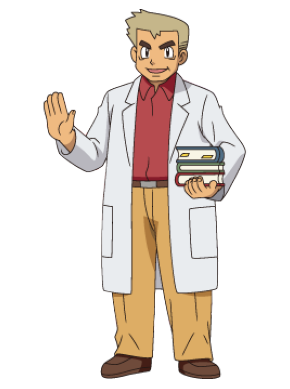


People call me the Pokémon Prof! This world is inhabited by creatures called Pokémon!
For some people, Pokémon are pets. Others use them for fights.
Myself...I study Pokémon as a profession.


First, what is your name?  diego



Oak: Right! So your name is Diego!

On the desk there are my inventions, the Pokédex and the Fight Club!
Take them! Those are hi-tech encyclopedias on all the Pokémon in the world…


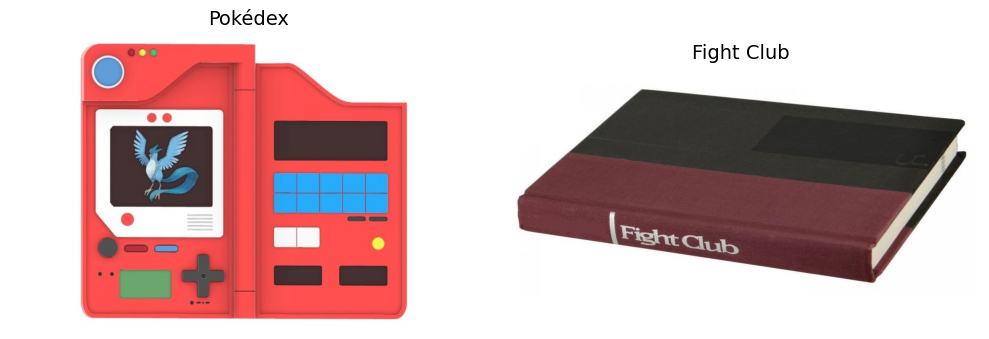


Diego! Your very own Pokémon legend is about to unfold!
A world of dreams and adventures with Pokémon awaits! Let's go!


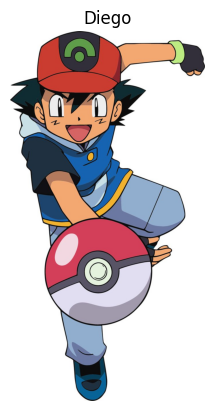


Diego, you began your journey as an amateur and unskilled Pokémon Trainer.
The journey was long but you managed to collect every badge from the Gym Leaders.


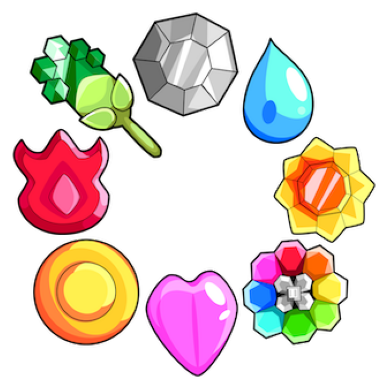


Diego, you grew up through countless challenges, proving your worth as a Pokémon Trainer.
You have faced fears, overcome obstacles, and forged an unbreakable bond with your Pokémon.

Diego, you are now one of the best hopes to stop Team Rocket and end their organization!


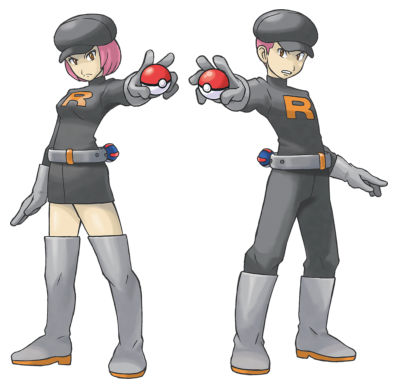


Your last challenge awaits you: in the headquarters of Team Rocket stands your ultimate opponent! 
The fight against their leader will decide the fate of the world.

But remember, you are not alone... Your Pokémon are by your side! Together, you will face this final challenge!


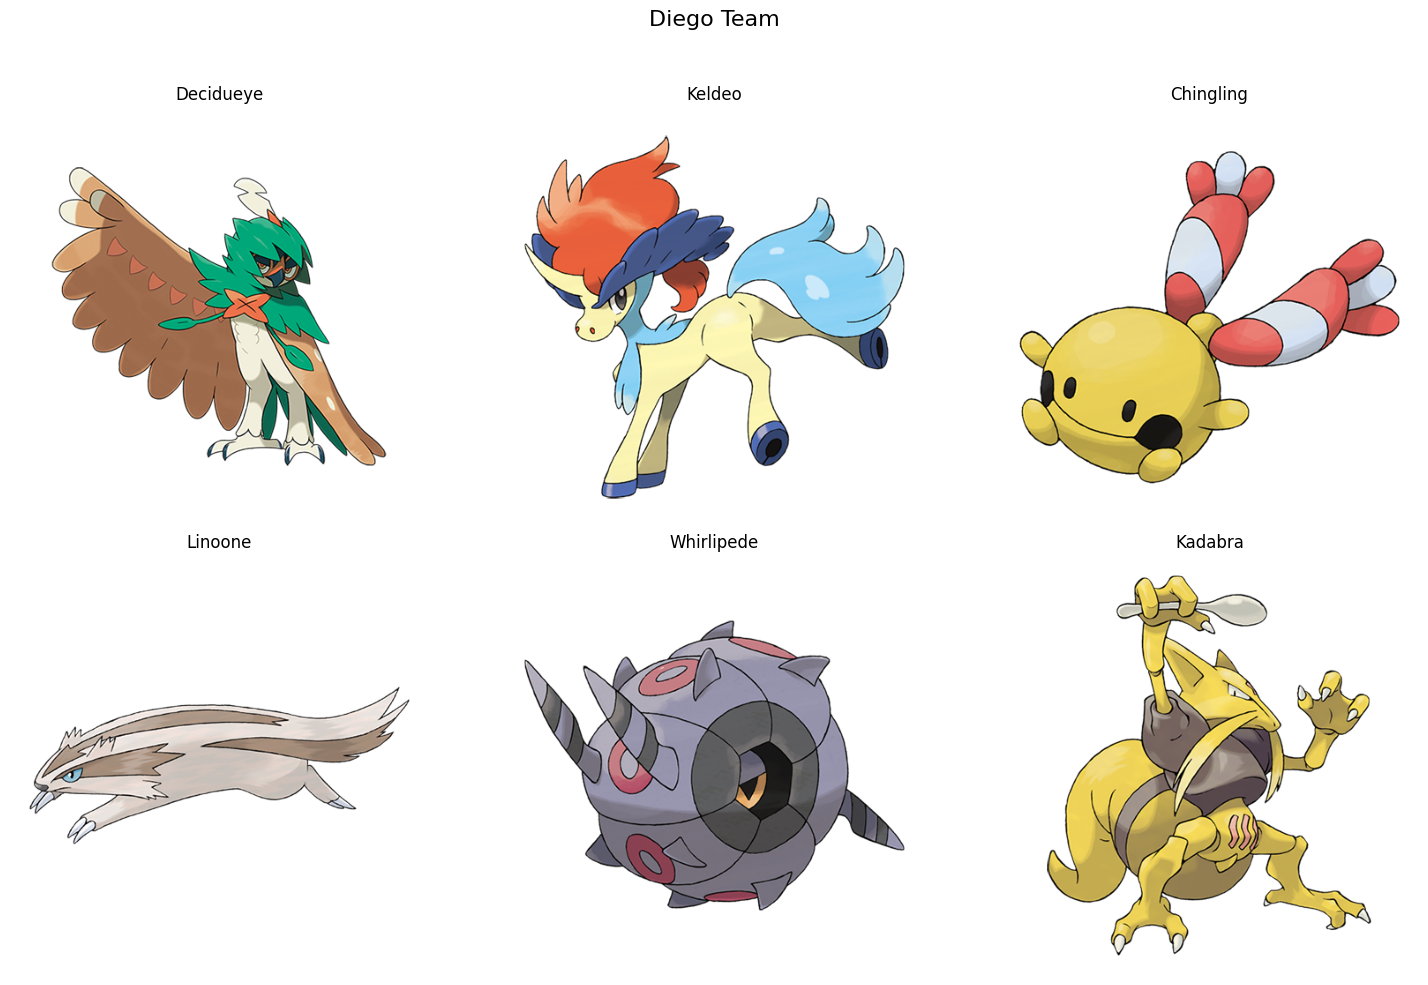


A deep voice echoes in the shadows: 
Well, well, well... So, Diego! I must say, I am impressed you got here!
Team Rocket captures Pokémon from around the world. They're important tools for keeping our criminal enterprise going.
I am Giovanni, the leader of this organization!


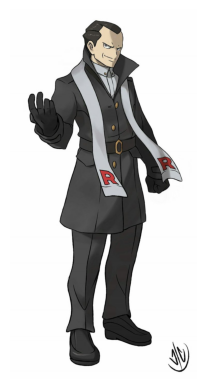

Giovanni: For your insolence, you will feel a world of pain!
My best Pokémon will crush your pathetic team! You are not prepared!


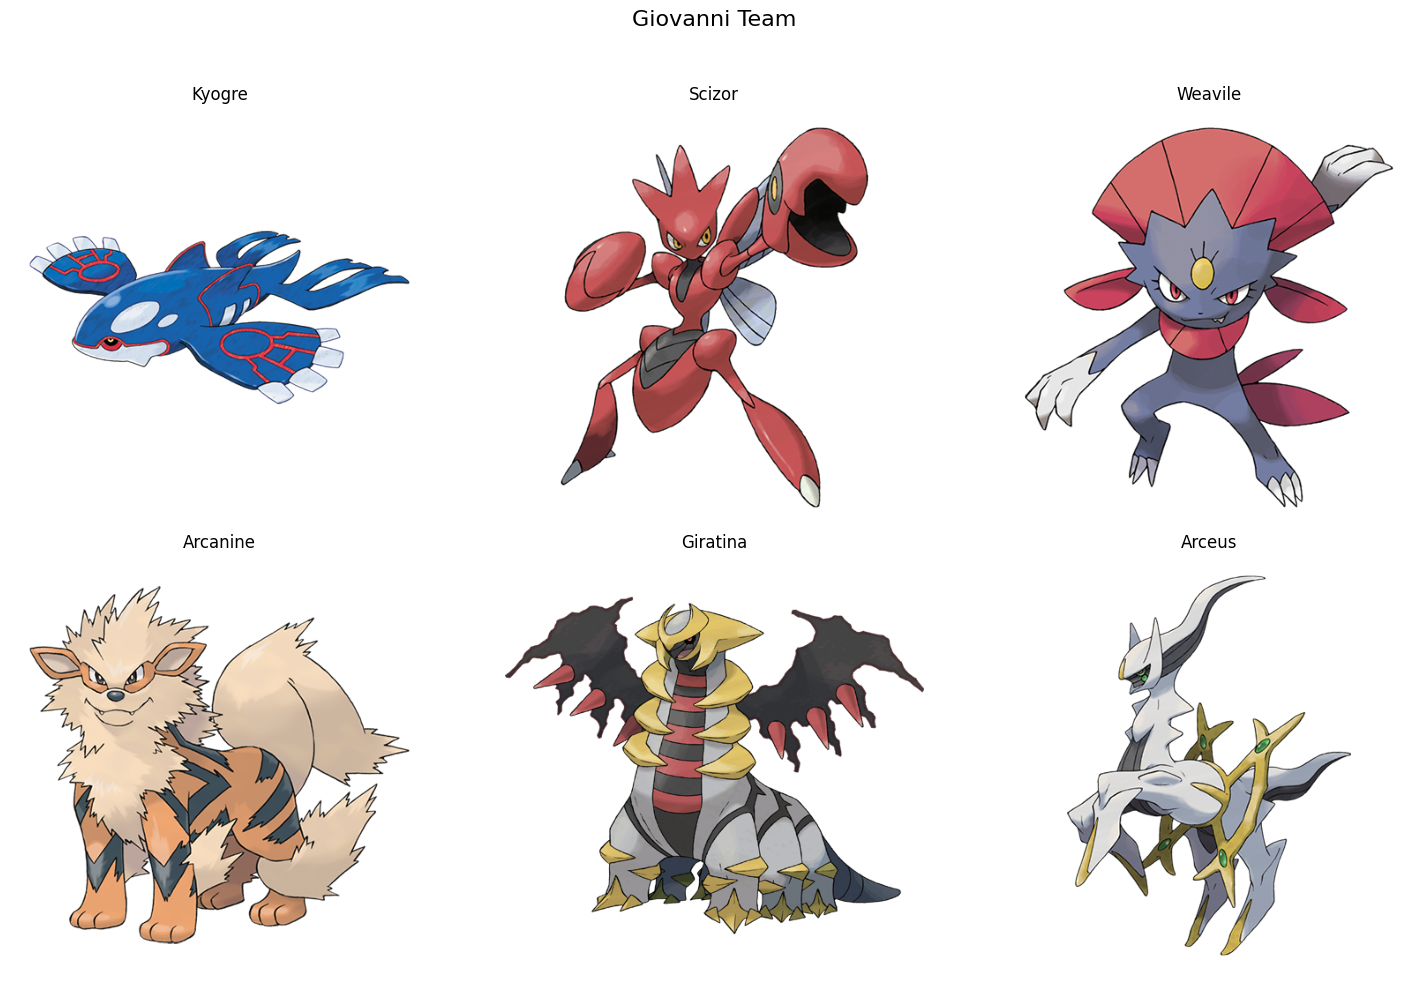


Diego: Okay! It's time to use my Pokédex.

Pokédex: Hello Diego. Let me run the analysis for you.   
... Hmm ... You are facing a strong team.
The data indicate that those Pokémon are made to fight!
Probability of Diego Winning: 0.00%
I advise you to proceed with extreme caution...


Diego Team Stats:
         Name  HP  Attack  Defense  Speed   Type 1    Type 2
1   decidueye  78     107       75     70    grass     ghost
2      keldeo  91      72       90    108    water  fighting
3   chingling  45      30       50     45  psychic      none
4     linoone  78      70       61    100   normal      none
5  whirlipede  40      55       99     47      bug    poison
6     kadabra  40      35       30    105  psychic      none

Giovanni Team Stats:
       Name   HP  Attack  Defense  Speed  Type 1  Type 2
1    kyogre  100     150       90     90   water    none
2    scizor   70     150      140     75     bug   steel
3   weavile   70     120       65    125    dark     ice
4  arcanine   90   

In [39]:
################################## INTRODUCTION #########################################
################################## INTRODUCTION #########################################

# Initialize pygame mixer
pygame.mixer.init()

# Define sound playback function for the Game Boy startup sound
def play_Gameboy_startup(gameboy_startup_path, volume=1.0):
    startup_sound = pygame.mixer.Sound(gameboy_startup_path)
    startup_sound.set_volume(volume)
    
    # Play startup sound and wait for it to finish
    channel = pygame.mixer.find_channel()
    if channel is not None:
        channel.play(startup_sound)
        while channel.get_busy():
            time.sleep(0.1)  # Wait for the startup sound to finish


# Play Game Boy startup sound
gameboy_sound_path = r'C:\Users\benja\Ironhack\Final project\Sounds\Gameboy_startup.mp3'
play_Gameboy_startup(gameboy_sound_path, volume=0.3)

# Quit the mixer at the end of the program
pygame.mixer.quit()


# Initialize Pygame and other components
pygame.init()

def play_Pokémon_ending(pokemon_ending, volume=1.0):
    """Function to play ending music in a separate thread."""
    pygame.mixer.music.load(pokemon_ending)
    pygame.mixer.music.set_volume(volume)
    pygame.mixer.music.play()  # Play the sound once

    # Monitor the music playing status
    def monitor_music():
        while pygame.mixer.music.get_busy():
            time.sleep(0.1)

    music_thread = threading.Thread(target=monitor_music)
    music_thread.start()
    return music_thread

# Define the paths to your sound files
Pokémon_ending = r'C:\Users\benja\Ironhack\Final project\Sounds\Pokemon_ending.mp3'

def type_out(text, delay=0.045):
    """Simulate typing effect."""
    for char in text:
        sys.stdout.write(char)
        sys.stdout.flush()
        time.sleep(delay)
    print()  # Move to the next line after finishing the text

def display_Oak():
    # Define the path to the image
    image_path = os.path.join("Images", "Oak.png")

    # Open and display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

def display_pokedex_and_fight_club():
    # Define the paths to the images
    pokedex_path = os.path.join("Images", "Pokedex_image.jpeg")
    fight_club_path = os.path.join("Images", "Fight_club.jpg")

    # Load the images
    pokedex_img = Image.open(pokedex_path)
    fight_club_img = Image.open(fight_club_path)

    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the Pokédex image on the left
    axes[0].imshow(pokedex_img)
    axes[0].axis('off')  # Turn off axis labels
    axes[0].set_title("Pokédex", fontsize=14)

    # Display the Fight Club image on the right
    axes[1].imshow(fight_club_img)
    axes[1].axis('off')  # Turn off axis labels
    axes[1].set_title("Fight Club", fontsize=14)

    # Adjust layout to prevent title overlap
    plt.tight_layout()
    plt.show()


def start_game():
    type_out(f"""\nOak: Hello there! Welcome to the world of Pokémon! My name is OAK!""")

    display_Oak()
    
    type_out(f"""\nPeople call me the Pokémon Prof! This world is inhabited by creatures called Pokémon!
For some people, Pokémon are pets. Others use them for fights.
Myself...I study Pokémon as a profession.""")
    
    # Use the type_out function to display the prompt
    name = input("First, what is your name? ")
    
    type_out(f"""\nOak: Right! So your name is {name.capitalize()}!""")

    type_out(f"""\nOn the desk there are my inventions, the Pokédex and the Fight Club!
Take them! Those are hi-tech encyclopedias on all the Pokémon in the world…""")

    # Display the Pokédex and Fight Club images side by side
    display_pokedex_and_fight_club()

    type_out(f"""\n{name.capitalize()}! Your very own Pokémon legend is about to unfold!
A world of dreams and adventures with Pokémon awaits! Let's go!""")
    return name
    
def display_image(name):
    # Define the path to the image
    image_path = os.path.join("Images", "Ash.jpg")

    # Open the image
    img = Image.open(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.title(f"{name.capitalize()}")  # Display the player's name
    plt.show()

# Define the path to your ending sound file
Pokémon_ending = r'C:\Users\benja\Ironhack\Final project\Sounds\Pokemon_ending.mp3'

# Start the music in a separate thread
music_thread = threading.Thread(target=play_Pokémon_ending, args=(Pokémon_ending, 0.03))
music_thread.start()

# Start the game and get the player's name
player_name = start_game()

# Wait for the music thread to finish (if you want to ensure it completes)
music_thread.join()

# Display the image with the player's name
display_image(player_name)

#################################################################################################################################################
#################################################################################################################################################

def create_images_dict(pokemon_names):
    # Create a mapping from Pokémon names to image paths, handling special characters
    images = {}
    for name in pokemon_names:
        images[name.lower()] = f"Images/{name}.png"  # Store keys in lowercase
    return images

def display_badges():
    # Define the path to the image
    image_path = os.path.join("Images", "badges.png")

    # Open the image
    img = Image.open(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

def display_Team_Rocket():
    # Define the path to the image
    image_path = os.path.join("Images", "Team_Rocket.png")

    # Open the image
    img = Image.open(image_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

def select_random_pokemon(images, num_images=6):
    team = []
    available_pokemon = list(images.keys())

    while len(team) < num_images:
        pokemon = random.choice(available_pokemon)
        if pokemon not in team:  # Ensure uniqueness
            team.append(pokemon)

    return team  # Return the selected team

def main_selection1():
    type_out(f"""\n{player_name.capitalize()}, you began your journey as an amateur and unskilled Pokémon Trainer.
The journey was long but you managed to collect every badge from the Gym Leaders.""") 

    display_badges()

    type_out(f"""\n{player_name.capitalize()}, you grew up through countless challenges, proving your worth as a Pokémon Trainer.
You have faced fears, overcome obstacles, and forged an unbreakable bond with your Pokémon.""")
    
    type_out(f"""\n{player_name.capitalize()}, you are now one of the best hopes to stop Team Rocket and end their organization!""")

    display_Team_Rocket()
    
    type_out(f"""\nYour last challenge awaits you: in the headquarters of Team Rocket stands your ultimate opponent! 
The fight against their leader will decide the fate of the world.

But remember, you are not alone... Your Pokémon are by your side! Together, you will face this final challenge!""")
    images = create_images_dict(pokemon_names)
    team = select_random_pokemon(images)
    return team, images  # Return both team and images

def display_pokemon_images_challenger(pokemon_team, images):
    plt.figure(figsize=(15, 10))
    plt.suptitle(f"{player_name.capitalize()} Team", fontsize=16)

    displayed_count = 0
    for pokemon_name in pokemon_team:
        lower_name = pokemon_name.lower()
        image_path = images.get(lower_name)
        if image_path and os.path.exists(image_path):
            img = Image.open(image_path)
            plt.subplot(2, 3, displayed_count + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(pokemon_name.capitalize(), fontsize=12)
            displayed_count += 1
            
            if displayed_count >= 6:
                break

    while displayed_count < 6:
        plt.subplot(2, 3, displayed_count + 1)
        plt.axis('off')
        displayed_count += 1

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

challenger_team, images = main_selection1()
display_pokemon_images_challenger(challenger_team, images)

#################################################################################################################################################
#################################################################################################################################################

#A list of 50 strong pokemons through the Gen I to Gen VII
Giovanni_pokemon = [
    "Mewtwo",             # Gen I
    "Rayquaza",           # Gen III
    "Groudon",            # Gen III
    "Kyogre",             # Gen III
    "Arceus",             # Gen IV
    "Dialga",             # Gen IV
    "Palkia",             # Gen IV
    "Giratina",           # Gen IV
    "Xerneas",            # Gen VI
    "Yveltal",            # Gen VI
    "Zygarde",            # Gen VI
    "Solgaleo",           # Gen VII
    "Lunala",             # Gen VII
    "Tapu Koko",          # Gen VII
    "Tapu Lele",          # Gen VII
    "Tapu Bulu",          # Gen VII
    "Tapu Fini",          # Gen VII
    "Charizard",          # Gen VI
    "Gardevoir",          # Gen VI
    "Heatran",            # Gen IV
    "Incineroar",         # Gen VII
    "Greninja",           # Gen VI
    "Excadrill",          # Gen V
    "Ferrothorn",         # Gen V
    "Raikou",             # Gen II
    "Dragonite",          # Gen I
    "Scizor",             # Gen VI
    "Lucario",            # Gen VI
    "Aegislash",          # Gen VI
    "Tyranitar",          # Gen II
    "Sableye",            # Gen VI
    "Blaziken",           # Gen VI
    "Gyarados",           # Gen VI
    "Bisharp",            # Gen V
    "Kartana",            # Gen VII
    "Nihilego",           # Gen VII
    "Zapdos",             # Gen I
    "Landorus",           # Gen V
    "Mimikyu",            # Gen VII
    "Gardevoir",          # Gen III
    "Weavile",            # Gen IV
    "Volcarona",          # Gen V
    "Empoleon",           # Gen IV
    "Arcanine",           # Gen VII
    "Gengar",             # Gen I
    "Blastoise",          # Gen I
    "Chandelure",         # Gen V
    "Cresselia",          # Gen IV
    "Venusaur",           # Gen I
    "Nidoking",           # Gen I
]

#################################################################################################################################################
#################################################################################################################################################

def create_images_dict_Giovanni(Giovanni_pokemon):
    # Create a mapping from Pokémon names to image paths, handling special characters
    images = {}
    for name in Giovanni_pokemon:
        images[name.lower()] = f"Images/{name}.png"  # Store keys in lowercase
    return images

def select_random_pokemon(images, num_images=6):
    team = []
    available_pokemon = list(images.keys())

    while len(team) < num_images:
        pokemon = random.choice(available_pokemon)
        if pokemon not in team:  # Ensure uniqueness
            team.append(pokemon)

    return team  # Return the selected team

def main_selection2():
    type_out(f"""\nA deep voice echoes in the shadows: 
Well, well, well... So, {player_name.capitalize()}! I must say, I am impressed you got here!
Team Rocket captures Pokémon from around the world. They're important tools for keeping our criminal enterprise going.
I am Giovanni, the leader of this organization!""") 

    # Display Giovanni's image
    image_path = os.path.join("Images", "Giovanni.jpg")
    
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()
    type_out("""Giovanni: For your insolence, you will feel a world of pain!
My best Pokémon will crush your pathetic team! You are not prepared!""")
    
    images = create_images_dict_Giovanni(Giovanni_pokemon)  # Use Giovanni_pokemon instead of pokemon_names
    Giovanni_team = select_random_pokemon(images)  # Changed to Giovanni_team
    return Giovanni_team, images  # Return both team and images


def display_pokemon_images_giovanni(pokemon_team, images):
    plt.figure(figsize=(15, 10))
    plt.suptitle("Giovanni Team", fontsize=16)  # Updated title

    displayed_count = 0
    for pokemon_name in pokemon_team:
        lower_name = pokemon_name.lower()
        image_path = images.get(lower_name)
        # print(f"Checking for image: {lower_name}")  # Debugging line
        if image_path and os.path.exists(image_path):
            img = Image.open(image_path)
            plt.subplot(2, 3, displayed_count + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(pokemon_name.capitalize(), fontsize=12)
            displayed_count += 1
            
            if displayed_count >= 6:
                break

    while displayed_count < 6:
        plt.subplot(2, 3, displayed_count + 1)
        plt.axis('off')
        displayed_count += 1

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage
Giovanni_team, images = main_selection2()  
# print(Giovanni_team)  
display_pokemon_images_giovanni(Giovanni_team, images) 


#################################################################################################################################################
#################################################################################################################################################
# Color codes for displaying HP
BLUE = "\033[94m"
RED = "\033[91m"
ORANGE = "\033[93m"
GREEN = "\033[92m"
RESET = "\033[0m"

def format_hp(hp, total_hp):
    """Format HP with color coding based on the percentage."""
    percentage = (hp / total_hp) * 100
    if percentage > 50:
        return f"{GREEN}{hp}/{total_hp}{RESET}"
    elif percentage > 10:
        return f"{ORANGE}{hp}/{total_hp}{RESET}"
    else:
        return f"{RED}{hp}/{total_hp}{RESET}"
        
class BasePokemon:
    def __init__(self, name, hp, attack, defense, speed, type1, type2=None):
        self.name = name
        self.total_hp = hp  # Store the maximum HP
        self.hp = hp
        self.attack = attack
        self.defense = defense
        self.speed = speed
        self.type1 = type1
        self.type2 = type2
        self.alive = True  # Adding an alive status for battle logic

    def get_status(self):
        return {
            'name': self.name,
            'hp': self.hp,
            'total_hp': self.total_hp,
            'attack': self.attack,
            'defense': self.defense,
            'speed': self.speed,
            'type1': self.type1,
            'type2': self.type2,
            'alive': self.alive,
        }

    def hit(self, enemy):
        if not self.alive:
            return False  # Return False if this Pokémon is not alive
    
        # Base damage calculation
        damage = max(0, (self.attack - enemy.defense))
        
        # Calculate type effectiveness
        effectiveness = 1.0  # Default effectiveness
        type1 = self.type1.lower()
        type2 = self.type2.lower() if self.type2 else None
        
        # Check effectiveness against enemy's type1
        if type1 in type_effectiveness_table.columns:
            effectiveness *= type_effectiveness_table.loc[type_effectiveness_table['type1'] == enemy.type1, type1].values[0]
        
        # Check effectiveness against enemy's type2 if applicable
        if type2 and type2 in type_effectiveness_table.columns:
            effectiveness *= type_effectiveness_table.loc[type_effectiveness_table['type1'] == enemy.type2, type2].values[0]
    
        # Apply effectiveness to damage
        damage = int(damage * effectiveness)
    
        # Ensure damage isn't negative
        damage = max(0, damage)
        enemy.hp -= damage
        
        # Display damage and HP with color coding
        enemy_hp_display = format_hp(max(0, enemy.hp), enemy.total_hp)  # Use format_hp for color coding
        print(f"{self.name.capitalize()} hits {enemy.name.capitalize()} for {damage} damage. {enemy.name.capitalize()} HP: {enemy_hp_display}")
    
        # Check if the enemy has fainted after the print statement
        if enemy.hp <= 0:
            enemy.hp = 0  # Set HP to 0 to avoid negative values
            enemy.alive = False
            print(f"{enemy.name.capitalize()} has fainted!")
    
        return damage > 0  # Return True if damage was dealt, else False




#################################################################################################################################################
#################################################################################################################################################

def create_stats_dict(df):
    stats_dict = {}
    for index, row in df.iterrows():
        name = row['name'].lower()  # Ensure the name is in lowercase
        stats_dict[name] = {
            'hp': row['hp'],
            'attack': row['attack'],
            'defense': row['defense'],
            'speed': row['speed'],
            'type1': row['type1'],
            'type2': row['type2'],
        }
    return stats_dict

def create_pokemon(name, stats_dict):
    # Get stats from the dictionary
    stats = stats_dict.get(name.lower())
    if stats:
        hp = stats['hp']
        attack = stats['attack']
        defense = stats['defense']
        speed = stats['speed']
        type1 = stats['type1']
        type2 = stats['type2']
        return BasePokemon(name, hp, attack, defense, speed, type1, type2)
    else:
        raise ValueError(f"Stats for Pokémon '{name}' not found.")

# Create the stats dictionary from the DataFrame
stats_dict = create_stats_dict(df1)

# Create Pokémon objects for each team
challenger_pokemons = [create_pokemon(name, stats_dict) for name in challenger_team]
Giovanni_pokemons = [create_pokemon(name, stats_dict) for name in Giovanni_team]


#################################################################################################################################################
#################################################################################################################################################

#Probability of winning calculated based on the tables and the hit function

def simulate_battle(challenger_team, Giovanni_team, stats_dict, num_simulations=10):
    challenger_wins = 0

    for _ in range(num_simulations):
        challenger_pokemons = [create_pokemon(name, stats_dict) for name in challenger_team]
        Giovanni_pokemons = [create_pokemon(name, stats_dict) for name in Giovanni_team]

        # Track whether Giovanni inflicts any damage
        giovanni_inflicted_damage = False

        # Battle until one side is completely defeated
        while any(p.alive for p in challenger_pokemons) and any(p.alive for p in Giovanni_pokemons):
            # Challenger attacks first
            for challenger_pokemon in challenger_pokemons:
                if challenger_pokemon.alive:
                    opponent = next((p for p in Giovanni_pokemons if p.alive), None)
                    if opponent:
                        challenger_pokemon.hit(opponent)

            # Giovanni's turn to attack
            for giovanni_pokemon in Giovanni_pokemons:
                if giovanni_pokemon.alive:
                    opponent = next((p for p in challenger_pokemons if p.alive), None)
                    if opponent:
                        damage_inflicted = giovanni_pokemon.hit(opponent)
                        if damage_inflicted > 0:
                            giovanni_inflicted_damage = True

        # Check who won
        if any(p.alive for p in challenger_pokemons):
            challenger_wins += 1
        elif not giovanni_inflicted_damage:
            # If Giovanni did not inflict any damage, count as a win for the challenger
            challenger_wins += 1

    probability_of_winning = challenger_wins / num_simulations * 100
    return probability_of_winning

   
#################################################################################################################################################
#################################################################################################################################################

#sys.stdout is temporarily redirected to os.devnull, which is a special file that discards all data written to it. 
#This effectively hides any print output.
#After the simulation completes, sys.stdout is restored to its original value, allowing you to print the probability without any extra output.

# Suppress output
original_stdout = sys.stdout  # Save a reference to the original standard output
sys.stdout = open(os.devnull, 'w')  # Redirect standard output to devnull

# Run the simulation
probability = simulate_battle(challenger_team, Giovanni_team, stats_dict, num_simulations=10)

# Restore original output
sys.stdout.close()
sys.stdout = original_stdout  # Reset standard output to its original value

#################################################################################################################################################
#################################################################################################################################################

type_out(f"""\n{player_name.capitalize()}: Okay! It's time to use my Pokédex.

Pokédex: Hello {player_name.capitalize()}. Let me run the analysis for you.   
... Hmm ... You are facing a strong team.
The data indicate that those Pokémon are made to fight!""")
type_out(f"""\033[1mProbability of {player_name.capitalize()} Winning: {probability:.2f}%\033[0m""")
type_out(f"""I advise you to proceed with extreme caution...""")

# Prepare data for displaying in tabular format
def create_pokemon_stats_table(pokemons):
    data = []
    for pk in pokemons:
        stats = pk.get_status()
        data.append([stats['name'], stats['hp'], stats['attack'], stats['defense'], stats['speed'], stats['type1'], stats['type2']])
    # Create DataFrame and set index to start from 1
    df = pd.DataFrame(data, columns=['Name', 'HP', 'Attack', 'Defense', 'Speed', 'Type 1', 'Type 2'])
    df.index += 1  # Shift index to start from 1
    return df

# Create tables for both teams
challenger_table = create_pokemon_stats_table(challenger_pokemons)
Giovanni_table = create_pokemon_stats_table(Giovanni_pokemons)

# Add a new line for spacing before displaying the tables
print("\n")
# Display the tables
print(f"{player_name.capitalize()} Team Stats:")
print(challenger_table)

print("\nGiovanni Team Stats:")
print(Giovanni_table)

type_out(f"""\n{player_name.capitalize()}: Okay, I am ready now! Let's battle!""")

In [ ]:
#######################################################################################################################


Diego available Pokémon:
1. Decidueye (HP: 78/78)
2. Keldeo (HP: 91/91)
3. Chingling (HP: 45/45)
4. Linoone (HP: 78/78)
5. Whirlipede (HP: 40/40)
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  1



You chose Decidueye!
Giovanni chooses Kyogre!
Kyogre is attacking...
Kyogre hits Decidueye for 75 damage. Decidueye HP: 3/78
Decidueye is attacking...
Decidueye hits Kyogre for 17 damage. Kyogre HP: 83/100

Diego available Pokémon:
1. Decidueye (HP: 3/78)
2. Keldeo (HP: 91/91)
3. Chingling (HP: 45/45)
4. Linoone (HP: 78/78)
5. Whirlipede (HP: 40/40)
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  1



You chose Decidueye!
Giovanni chooses Kyogre!
Kyogre is attacking...
Kyogre hits Decidueye for 75 damage. Decidueye HP: 0/78
Decidueye has fainted!

Diego available Pokémon:
2. Keldeo (HP: 91/91)
3. Chingling (HP: 45/45)
4. Linoone (HP: 78/78)
5. Whirlipede (HP: 40/40)
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  2



You chose Keldeo!
Giovanni chooses Kyogre!
Keldeo is attacking...
Keldeo hits Kyogre for 0 damage. Kyogre HP: 83/100
Kyogre is attacking...
Kyogre hits Keldeo for 60 damage. Keldeo HP: 31/91

Diego available Pokémon:
2. Keldeo (HP: 31/91)
3. Chingling (HP: 45/45)
4. Linoone (HP: 78/78)
5. Whirlipede (HP: 40/40)
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  2



You chose Keldeo!
Giovanni chooses Kyogre!
Keldeo is attacking...
Keldeo hits Kyogre for 0 damage. Kyogre HP: 83/100
Kyogre is attacking...
Kyogre hits Keldeo for 60 damage. Keldeo HP: 0/91
Keldeo has fainted!

Diego available Pokémon:
3. Chingling (HP: 45/45)
4. Linoone (HP: 78/78)
5. Whirlipede (HP: 40/40)
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  3



You chose Chingling!
Giovanni chooses Kyogre!
Kyogre is attacking...
Kyogre hits Chingling for 100 damage. Chingling HP: 0/45
Chingling has fainted!

Diego available Pokémon:
4. Linoone (HP: 78/78)
5. Whirlipede (HP: 40/40)
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  4



You chose Linoone!
Giovanni chooses Kyogre!
Linoone is attacking...
Linoone hits Kyogre for 0 damage. Kyogre HP: 83/100
Kyogre is attacking...
Kyogre hits Linoone for 89 damage. Linoone HP: 0/78
Linoone has fainted!

Diego available Pokémon:
5. Whirlipede (HP: 40/40)
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  5



You chose Whirlipede!
Giovanni chooses Kyogre!
Kyogre is attacking...
Kyogre hits Whirlipede for 51 damage. Whirlipede HP: 0/40
Whirlipede has fainted!

Diego available Pokémon:
6. Kadabra (HP: 40/40)


Diego, choose your Pokémon by number:  6



You chose Kadabra!
Giovanni chooses Kyogre!
Kadabra is attacking...
Kadabra hits Kyogre for 0 damage. Kyogre HP: 83/100
Kyogre is attacking...
Kyogre hits Kadabra for 120 damage. Kadabra HP: 0/40
Kadabra has fainted!

Giovanni Team wins!
Giovanni: Mwahahaha! *deep laughter*  
That was your best shot?   
I crushed you like a pathetic bug!
I hope you enjoyed that, my Pokémon surely did!
Your efforts were amusing. I look forward to your next futile attempt!


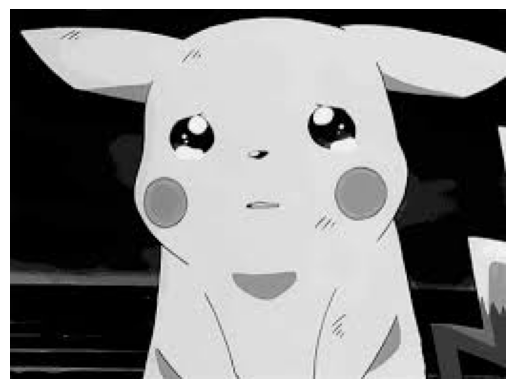


Current Score: Wins: 0, Losses: 1


Would you like to try again? (yes/no):  yes


Diego's available Pokémon:
Decidueye (HP: 78/78)
Keldeo (HP: 91/91)
Chingling (HP: 45/45)
Linoone (HP: 78/78)
Whirlipede (HP: 40/40)
Kadabra (HP: 40/40)


Would you like to swap a Pokémon? (yes/no):  yes


Challenger available before swap:
Diego's available Pokémon:
Decidueye (HP: 78/78)
Keldeo (HP: 91/91)
Chingling (HP: 45/45)
Linoone (HP: 78/78)
Whirlipede (HP: 40/40)
Kadabra (HP: 40/40)


Enter the name of the Pokémon you want to swap out:  keldeo


You have selected to swap out Keldeo!


Enter the name of the Pokémon you want to swap in:  pikachu


Keldeo has been swapped out for Pikachu!

Challenger available after swap:
Diego's available Pokémon:
Decidueye (HP: 78/78)
Pikachu (HP: 35/35)
Chingling (HP: 45/45)
Linoone (HP: 78/78)
Whirlipede (HP: 40/40)
Kadabra (HP: 40/40)


KeyboardInterrupt: Interrupted by user

In [41]:
# Initialize Pygame and other components
pygame.init()

#################################### THE GAME ###########################################
#################################### THE GAME ###########################################

def play_Pokémon_battle(pokemon_battle, volume=1.0):
    """Function to play battle music in a separate thread."""
    # Load the sound file
    pygame.mixer.music.load(pokemon_battle)
    
    # Set the volume (0.0 to 1.0)
    pygame.mixer.music.set_volume(volume)
    
    # Play the sound in a loop
    pygame.mixer.music.play(-1)  # Loop the music indefinitely

    # Monitor the music playing status
    def monitor_music():
        while pygame.mixer.music.get_busy():
            time.sleep(0.1)

    # Start the monitoring thread
    music_thread = threading.Thread(target=monitor_music)
    music_thread.start()

    # Return the thread for potential stopping
    return music_thread

# Define the path to your sound file
Pokémon_battle = r'C:\Users\benja\Ironhack\Final project\Sounds\Pokemon_battle.mp3'

#################################################################################################
#################################################################################################

# Display the right picture if you win or you lose
def display_Pokemon_sad():
    image_path = os.path.join("Images", "Pokemon_sad.jpeg")
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

def display_Pokemon_happy():
    image_path = os.path.join("Images", "Pokemon_happy.png")
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

# Giovanni's random taunting sentences if you lose 
giovanni_lines_1 = [
    "That was your best shot?",
    "You call that a Pokémon battle?",
    "You thought you stood a chance? How adorable!"
]
giovanni_lines_2 = [
    "Better luck next time, if you’re even worthy!",
    "Come back when you’ve actually trained!",
    "Try again, if you dare! Kiddo!",
    "Your efforts were amusing. I look forward to your next futile attempt!",
    "Maybe next time you’ll actually challenge me!"
]

def play_battle_music(pokemon_battle_path, volume=0.05):
    """Function to play battle music in a separate thread."""
    play_Pokémon_battle(pokemon_battle_path, volume)

# Global variables to track available Pokémon and win/loss counters
challenger_available = []  # Persist across battles
wins = 0
losses = 0

# Function to heal all Pokémon to full HP
def heal_pokemon(pokemon_list):
    """Function to fully heal all Pokémon in the list."""
    for pokemon in pokemon_list:
        pokemon.hp = pokemon.total_hp  # Set HP to maximum
        pokemon.alive = True  # Ensure status is 'alive'

# Display available Pokémon
def display_available_pokemon(pokemon_list):
    """Function to display available Pokémon."""
    print(f"{player_name.capitalize()}'s available Pokémon:")
    for pk in pokemon_list:
        if pk.alive:
            hp_display = format_hp(pk.hp, pk.total_hp)
            print(f"{BLUE}{pk.name.capitalize()}{RESET} (HP: {hp_display})")

# Helper function to select Pokémon to swap out
def select_pokemon_to_swap(challenger_available, action):
    while True:
        swap_out_name = input(f"Enter the name of the Pokémon you want to {action}: ").strip().capitalize()
        pokemon_to_swap_out = next((pk for pk in challenger_available if pk.name.capitalize() == swap_out_name and pk.alive), None)

        if pokemon_to_swap_out:
            print(f"You have selected to swap out {pokemon_to_swap_out.name.capitalize()}!")
            return pokemon_to_swap_out
        else:
            print("Invalid choice or Pokémon is not available. Please try again.")

# Helper function to select Pokémon to swap in
def select_pokemon_to_swap_in(stats_dict):
    while True:
        swap_in_name = input("Enter the name of the Pokémon you want to swap in: ").strip().lower()
        if swap_in_name in stats_dict:
            return create_pokemon(swap_in_name, stats_dict)  # Create a new Pokémon
        else:
            print("Invalid Pokémon name, please try again.")

# Function to handle Pokémon swapping for the challenger
def swap_pokemon(challenger_available, giovanni_available, stats_dict):
    """Function to handle Pokémon swapping for the challenger."""
    heal_pokemon(challenger_available)  # Ensure all available Pokémon are fully healed
    display_available_pokemon(challenger_available)  # Display available Pokémon

    while True:
        swap_choice = input("Would you like to swap a Pokémon? (yes/no): ").strip().lower()
        if swap_choice == 'yes':
            print("Challenger available before swap:")
            display_available_pokemon(challenger_available)

            # Selecting Pokémon to swap out
            pokemon_to_swap_out = select_pokemon_to_swap(challenger_available, "swap out")

            # Selecting Pokémon to swap in
            new_pokemon = select_pokemon_to_swap_in(stats_dict)

            # Replace the swapped-out Pokémon with the new Pokémon
            index = challenger_available.index(pokemon_to_swap_out)
            challenger_available[index] = new_pokemon  # Update the available Pokémon list
            print(f"{pokemon_to_swap_out.name.capitalize()} has been swapped out for {new_pokemon.name.capitalize()}!")

            print("\nChallenger available after swap:")
            display_available_pokemon(challenger_available)
        elif swap_choice == 'no':
            print("No Pokémon will be swapped.")
            break
        else:
            print("Invalid input. Please type 'yes' or 'no.'")

    print("\nUpdated available Pokémon:")
    display_available_pokemon(challenger_available)
    return challenger_available  # Return updated available Pokémon

# Main battle function
def battle(challenger_team, Giovanni_team, stats_dict, images):
    global wins, losses, challenger_available  # Access global counters and list

    # Start the battle music in a separate thread
    music_thread = threading.Thread(target=play_battle_music, args=(Pokémon_battle, 0.03))
    music_thread.start()

    # Initialize challenger_available if empty (first battle only)
    if not challenger_available:
        challenger_available = [create_pokemon(name, stats_dict) for name in challenger_team]
    
    # Initialize Giovanni's team and choose the first available Pokémon
    Giovanni_pokemons = [create_pokemon(name, stats_dict) for name in Giovanni_team]
    Giovanni_current_pokemon = next((p for p in Giovanni_pokemons if p.alive), None)
    
    used_Giovanni_pokemons = set()  # Track Giovanni's used Pokémon
    if Giovanni_current_pokemon:
        used_Giovanni_pokemons.add(Giovanni_current_pokemon.name.lower())

    # Main battle loop
    while any(p.alive for p in challenger_available) and any(p.alive for p in Giovanni_pokemons):
        # Challenger selects a Pokémon and battle continues...
        type_out(f"\n{player_name.capitalize()} available Pokémon:")
        for i, pk in enumerate(challenger_available, start=1):
            if pk.alive:
                hp_display = format_hp(pk.hp, pk.total_hp)
                print(f"{BLUE}{i}. {pk.name.capitalize()}{RESET} (HP: {hp_display})")

        # Input validation for the Pokémon selection
        while True:
            choice_input = input(f"{player_name.capitalize()}, choose your Pokémon by number: ")
            if choice_input.isdigit():
                choice = int(choice_input) - 1
                if 0 <= choice < len(challenger_available) and challenger_available[choice].alive:
                    challenger_pokemon = challenger_available[choice]
                    print()
                    type_out(f"You chose {challenger_pokemon.name.capitalize()}!")
                    type_out(f"Giovanni chooses {Giovanni_current_pokemon.name.capitalize()}!")
                    break
                else:
                    print("Invalid choice, please try again.")
            else:
                print("Please enter a valid number.")

        # Determine order of attack based on speed
        Giovanni_damage_dealt = False  # Track if Giovanni dealt damage

        if challenger_pokemon.speed >= Giovanni_current_pokemon.speed:
            type_out(f"{BLUE}{challenger_pokemon.name.capitalize()} is attacking...{RESET}")
            challenger_pokemon.hit(Giovanni_current_pokemon)
            if Giovanni_current_pokemon.alive:
                type_out(f"{RED}{Giovanni_current_pokemon.name.capitalize()} is attacking...{RESET}")
                Giovanni_damage_dealt = Giovanni_current_pokemon.hit(challenger_pokemon)
        else:
            type_out(f"{RED}{Giovanni_current_pokemon.name.capitalize()} is attacking...{RESET}")
            Giovanni_damage_dealt = Giovanni_current_pokemon.hit(challenger_pokemon)
            if challenger_pokemon.alive:
                type_out(f"{BLUE}{challenger_pokemon.name.capitalize()} is attacking...{RESET}")
                challenger_pokemon.hit(Giovanni_current_pokemon)

        # Handle fainted Pokémon
        if not Giovanni_current_pokemon.alive:
            type_out(f"{challenger_pokemon.name.capitalize()} fainted {Giovanni_current_pokemon.name.capitalize()}!")
            used_Giovanni_pokemons.add(Giovanni_current_pokemon.name.lower())  # Mark this Pokémon as used
            Giovanni_current_pokemon = None  # Prepare to switch

        # Check if Giovanni needs to switch Pokémon
        if Giovanni_current_pokemon and not Giovanni_damage_dealt:
            type_out(f"{Giovanni_current_pokemon.name.capitalize()} failed to deal damage, Giovanni will switch Pokémon.")
            used_Giovanni_pokemons.add(Giovanni_current_pokemon.name.lower())  # Mark this Pokémon as used
            Giovanni_current_pokemon = None  # Set current Pokémon to None to trigger a switch

        # Pick a new Giovanni Pokémon that is alive and not been used yet
        if Giovanni_current_pokemon is None:
            available_Giovanni_pokemons = [p for p in Giovanni_pokemons if p.alive and p.name.lower() not in used_Giovanni_pokemons]

            if available_Giovanni_pokemons:
                # Choose the first available unused Pokémon
                Giovanni_current_pokemon = available_Giovanni_pokemons[0]
                used_Giovanni_pokemons.add(Giovanni_current_pokemon.name.lower())  # Mark this Pokémon as used
                type_out(f"Giovanni chooses {Giovanni_current_pokemon.name.capitalize()} for the next round!")
            else:
                print("Giovanni has no available Pokémon left to switch to!")
                break  # End the battle if Giovanni has no Pokémon left

    # Check for the victor
    if any(p.alive for p in challenger_available):
        type_out(f"""\n\033[1m{player_name.capitalize()} Team wins!\033[0m
Giovanni: What in the world was that? Don't tell me some inexperienced kid can possibly be that strong!
What in the world are you? How is this possible...?
How can a kid like you manage to destroy my dream? The precious dream of Team Rocket has become little more than an illusion...
I'll tell you this {player_name.capitalize()}... No matter how strong you are, someday you'll lose.
Mwahahaha! *deep laughter*""")

        # Stop the music before displaying victory image
        pygame.mixer.music.stop()
        display_Pokemon_happy()
        wins += 1  # Increment wins counter
        time.sleep(2)  # Wait 2 seconds before showing the victory image

        # Play the Pokemon victory sound during the retry prompt
        pygame.mixer.music.load("Sounds/Pokemon_victory.mp3")
        pygame.mixer.music.set_volume(0.5)
        pygame.mixer.music.play()
        
    else:
        type_out(f"""\n\033[1mGiovanni Team wins!\033[0m
Giovanni: Mwahahaha! *deep laughter*  
{random.choice(giovanni_lines_1)}   
I crushed you like a pathetic bug!
I hope you enjoyed that, my Pokémon surely did!
{random.choice(giovanni_lines_2)}""")

        # Stop the music before displaying sad image
        pygame.mixer.music.stop()
        display_Pokemon_sad()
        losses += 1  # Increment losses counter
        time.sleep(2)  # Wait 2 seconds before showing the victory image

        # Play the villain laugh sound during the retry prompt
        pygame.mixer.music.load("Sounds/Vilain_laugh.mp3")
        pygame.mixer.music.play()

    # Display current win/loss stats
    print(f"\n\033[1mCurrent Score: Wins: {wins}, Losses: {losses}\033[0m")
    
   # After battle, prompt for retry and manage Pokémon swapping
    while True:
        retry = input("Would you like to try again? (yes/no): ").strip().lower()
        if retry == 'yes':
            # Swap Pokémon and return updated list
            challenger_available = swap_pokemon(challenger_available, Giovanni_pokemons, stats_dict)
            return True  # Retry the battle
        elif retry == 'no':
            print("Thank you for playing!")
            pygame.mixer.music.stop()
            return False  # Exit if player does not want to retry
        else:
            print("Invalid input. Please type 'yes' or 'no'.")

    # Stop the music thread after battle ends
    music_thread.join()
    pygame.quit()

# Main game loop
while True:
    should_retry = battle(challenger_team, Giovanni_team, stats_dict, images)
    if not should_retry:
        break

In [ ]:
print("Stopping music...")
pygame.mixer.music.stop()
music_thread.join()  # Wait for the music thread to finish
pygame.quit()  # Clean up the mixer

In [ ]:
####################################################################################################################

In [ ]:
####################################################################################################################

In [ ]:
####################################################################################################################

In [ ]:
####################################################################################################################

In [ ]:
####################################################################################################################

In [ ]:
####################################################################################################################

In [ ]:
#Internet webscrapping for the picture

#import requests
#from bs4 import BeautifulSoup
#from PIL import Image
#from io import BytesIO
#import matplotlib.pyplot as plt
#
#def display_pokemon_image(pokemon_name):
#    # Construct the URL for the Pokémon page
#    url = f"https://www.pokemon.com/us/pokedex/{pokemon_name.lower()}"
#    
#    # Set headers to mimic a browser
#    headers = {
#        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
#    }
#    
#    # Fetch the page
#    response = requests.get(url, headers=headers)
#    
#    if response.status_code == 200:
#        # Parse the HTML
#        soup = BeautifulSoup(response.content, 'html.parser')
#        
#        # Find the image element using the 'active' class
#        img_tag = soup.find('img', class_='active', alt=pokemon_name.capitalize())
#        
#        if img_tag:
#            img_url = img_tag['src']  # Get the URL from the 'src' attribute
#            
#            # Fetch the image
#            img_response = requests.get(img_url)
#            if img_response.status_code == 200:
#                # Open and display the image
#                img = Image.open(BytesIO(img_response.content))
#                plt.imshow(img)
#                plt.axis('off')  # Turn off axis labels
#                plt.show()
#            else:
#                print("Image could not be retrieved.")
#        else:
#            print("Image not found on the page. Check the HTML structure.")
#    else:
#        print("Pokémon not found or page could not be retrieved.")
#
## Example usage
#display_pokemon_image("pikachu")  # Change to "charmander" or any other Pokémon name